# New York Locating a New York Night Club

## Install Dependencies

In [2]:
conda install -c conda-forge geopandas --yes

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\psharer\AppData\Local\Continuum\anaconda3\envs\capstone

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-cpp-1.74.0           |       h54f0996_1        16.1 MB  conda-forge
    bzip2-1.0.8                |       h8ffe710_4         149 KB  conda-forge
    ca-certificates-2020.12.5  |       h5b45459_0         173 KB  conda-forge
    certifi-2020.12.5          |   py37h03978a9_1         143 KB  conda-forge
    cfitsio-3.470              |       h0af3d06_7         596 KB  conda-forge
    click-7.1.2                |     pyh9f0ad1d_0          64 KB  conda-forge
    click-plugins-1.1.1        |             py_0           9 KB  conda-forge
    cligj-0.7.1                |     pyhd8ed1ab_0

  xerces-c           conda-forge/win-64::xerces-c-3.2.3-h0e60522_2
  xz                 conda-forge/win-64::xz-5.2.5-h62dcd97_1
  zstd               conda-forge/win-64::zstd-1.4.8-h4e2f164_1

The following packages will be UPDATED:

  certifi            pkgs/main::certifi-2020.12.5-py37haa9~ --> conda-forge::certifi-2020.12.5-py37h03978a9_1

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2020.12.8-~ --> conda-forge::ca-certificates-2020.12.5-h5b45459_0
  openssl              pkgs/main::openssl-1.1.1i-h2bbff1b_0 --> conda-forge::openssl-1.1.1i-h8ffe710_0




certifi-2020.12.5    | 143 KB    |            |   0% 
certifi-2020.12.5    | 143 KB    | #1         |  11% 
certifi-2020.12.5    | 143 KB    | ########## | 100% 
certifi-2020.12.5    | 143 KB    | ########## | 100% 

lz4-c-1.9.3          | 134 KB    |            |   0% 
lz4-c-1.9.3          | 134 KB    | #########5 |  96% 
lz4-c-1.9.3          | 134 KB    | ##

In [3]:
conda install -c conda-forge geopy --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\psharer\AppData\Local\Continuum\anaconda3\envs\capstone

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          98 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0




geographiclib-1.50   | 34 KB     |            |   0% 
geographiclib-1.50   | 34 KB     | ####7      |  47% 
geographiclib-1.50   | 34 KB     | ########## | 100% 

geopy-2.1.0          | 64 KB     |

In [1]:
conda install -c conda-forge folium

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\psharer\AppData\Local\Continuum\anaconda3\envs\capstone

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    brotlipy-0.7.0             |py37hcc03f2d_1001         368 KB  conda-forge
    chardet-4.0.0              |   py37h03978a9_1         215 KB  conda-forge
    cryptography-3.3.1         |   py37hd8e9650_1         593 KB  conda-forge
    folium-0.12.0              |     pyhd8ed1ab_0          64 KB  conda-forge
    idna-2.10                  |     pyh9f0ad1d_0          52 KB  conda-forge
    pyopenssl-20.0.1           |     pyhd8ed1ab_0          48 KB  conda-forge
    pysocks-1.7.1              |   py37h03978a9_3          28 KB  conda-forge
    requests-2.25.1            |     pyhd

In [ ]:
conda install -c conda-forge osmnx

In [ ]:
conda install -c conda-forge rtree=0.9.3

In [4]:
import folium # map rendering library
import requests
import numpy as np
import random
import json
import pandas as pd
from pandas import json_normalize

In [5]:
from geopy.geocoders import Nominatim

In [6]:
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point

## Defining Functions

In [7]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [8]:
def venue_json_to_dataframe(response,neighborhood):
    columns_to_use =["name","proximal_neighborhood","map_neighborhood","lat","lng","distance"]
    venues = response['response']['venues']
    dataframe = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    dataframe_filtered['proximal_neighborhood'] = neighborhood;
    dataframe_filtered['map_neighborhood'] = "";
    dataframe_filtered = dataframe_filtered[columns_to_use];
    return dataframe_filtered

In [9]:
def get_venues_dataframe(latitude,longitude,radius,search_query,neighborhood):
    CLIENT_ID = 'ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420' # your Foursquare ID
    CLIENT_SECRET = 'IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA' # your Foursquare Secret
    VERSION = '20180604'
    LIMIT = 30
    print('Your credentails:')
    print('CLIENT_ID: ' + CLIENT_ID)
    print('CLIENT_SECRET:' + CLIENT_SECRET)
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    print(results)
    venues = results['response']['venues']
    if len(venues)==0:
        return -1
    dataframe = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    dataframe_filtered['neighborhood'] = neighborhood;
    cols = dataframe_filtered.columns.tolist()
    cols = [cols[0],cols[len(cols)-1]]+cols[1:len(cols)-2]
    dataframe_filtered = dataframe_filtered[cols];
    return dataframe_filtered

In [10]:
def test_get_venues_dataframe(latitude,longitude,radius,search_query,neighborhood):
    with open('.\\data\\ny_club_test_data.json') as nyc_club_test_json_file:
        nyc_venue_json = json.load(nyc_club_test_json_file)
    df_venues = venue_json_to_dataframe(nyc_venue_json,neighborhood)
    return df_venues

In [11]:
def assign_venue_map_neighborhood(boundaries,pt_venue):
    map_neighborhood = ""
    for key in boundaries.keys():
        if boundaries[key].contains(pt_venue):
            map_neighborhood = key
            break
    return map_neighborhood

In [12]:
def get_venues_from_all_neighborhoods(centers,boundaries,search_query,radius):
    columns_to_use =["name","proximal_neighborhood","map_neighborhood","lat","lng","distance"]
    df_all_venues = pd.DataFrame(columns=columns_to_use)
    for index,row in centers.iterrows():
        latitude = row["Latitude"]
        longitude = row["Longitude"]
        neighborhoodName = centers['Neighborhood']
        pt_neighborhood_center = Point(longitude,latitude)
        df_venues = get_venues_dataframe(latitude,longitude,radius,search_query,neighborhoodName)
        if df_venues is not -1:
            df_all_venues = df_all_venues.append(df_venues)
    return df_all_venues

In [13]:
def get_detailed_venue_info_from_id(venue_id):
    CLIENT_ID = 'ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420' # your Foursquare ID
    CLIENT_SECRET = 'IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA' # your Foursquare Secret
    VERSION = '20180604'
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    print(result['response']['venue'].keys())
    json_result = result['response']['venue']
    return json_result

In [14]:
def get_venue_rating_from_id(venue_id):
    result = get_detailed_venue_info_from_id(venue_id)
    try:
        return result["rating"]
    except:
       return -1

In [15]:
def get_venue_tips_from_id(venue_id):
    result = get_detailed_venue_info_from_id(venue_id)
    try:
        return result["tips"]
    except:
       return []

In [16]:
     for index,venue in df_venues.iterrows():
                pt_venue = Point(venue["lat"],venue["lng"])
                map_neighborhood = assign_venue_map_neighborhood(centers,boundaries,pt_venue,pt_neighborhood_center)
                print(map_neighborhood)

NameError: name 'df_venues' is not defined

## Data

### Boundaries of Each Neighborhood

In [17]:
nyc_geo = r'nyc-neighborhoods.geo.json' # geojson file
with open('.\\data\\nyc-neighborhoods.geo.json') as nyc_neighborhood_geo_json_file:
    neighborhood_geo_json = json.load(nyc_neighborhood_geo_json_file)
neighborhood_geo_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'Todt_Hill_Emerson_Hill_Heartland_Village_Lighthouse_Hill',
   'properties': {'name': 'Todt Hill-Emerson Hill-Heartland Village-Lighthouse Hill'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-74.151020317859, 40.59015817626249],
       [-74.14974235077241, 40.58948704133974],
       [-74.14851994747221, 40.588690068618966],
       [-74.14813100096761, 40.58856423082095],
       [-74.14590844951269, 40.58856423082095],
       [-74.14418597213513, 40.58856423082095],
       [-74.14168560174836, 40.58873201455164],
       [-74.13868515728423, 40.589067582013016],
       [-74.13851846592512, 40.58931925760905],
       [-74.13674042476119, 40.59141655424265],
       [-74.13629591447021, 40.59225547289609],
       [-74.13518463874276, 40.594478607327716],
       [-74.13379554408343, 40.59632422836529],
       [-74.13207306670587, 40.59783428194149],
       [-74.13123960991028, 40.59829568720088],
    

In [18]:
boundaries={}
for i in range(0,len(neighborhood_geo_json["features"])):
    try:
        boundaries[neighborhood_geo_json["features"][i]["id"]]= Polygon(neighborhood_geo_json["features"][i]['geometry']["coordinates"][0][0])
    except:
        boundaries[neighborhood_geo_json["features"][i]["id"]] = Polygon(neighborhood_geo_json["features"][i]['geometry']["coordinates"][0])  

In [19]:
with open('.\\data\\newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
    
#Extacting neighborhood data    
neighborhoods_data = newyork_data["features"]

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [20]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

## Analysis

## Load Neighborhood geo data

## Get the club data from Foursquare

## Bin the clubs in the neighborhoods

In [15]:
df_venues = get_venues_from_all_neighborhoods(neighborhoods,boundaries,'Nightclub',3000)

Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a5e5bac77547c2e4a5a5'}, 'response': {'venues': [{'id': '5066b2d7e4b073ee75be2315', 'name': 'Oasis HQ NightClub', 'location': {'address': '4137 White Plains Rd', 'lat': 40.89181900024414, 'lng': -73.85859680175781, 'labeledLatLngs': [{'label': 'display', 'lat': 40.89181900024414, 'lng': -73.85859680175781}], 'distance': 1011, 'postalCode': '10466', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4137 White Plains Rd', 'Bronx, NY 10466', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031461', 'hasPerk': False}, {'id': '57131183498

{'meta': {'code': 200, 'requestId': '6015a5e64d9cdc48c51b520b'}, 'response': {'venues': [{'id': '4b08e82bf964a5204b1323e3', 'name': 'Tantra Nightclub & Lounge', 'location': {'address': '10th Ave & 4th St SW', 'lat': 40.868988244852254, 'lng': -73.91725842509227, 'labeledLatLngs': [{'label': 'display', 'lat': 40.868988244852254, 'lng': -73.91725842509227}], 'distance': 3102, 'cc': 'US', 'city': 'Calgary', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['10th Ave & 4th St SW', 'Calgary, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031462', 'hasPerk': False}]}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId

{'meta': {'code': 200, 'requestId': '6015a5e897c81238cf269277'}, 'response': {'venues': [{'id': '5066b2d7e4b073ee75be2315', 'name': 'Oasis HQ NightClub', 'location': {'address': '4137 White Plains Rd', 'lat': 40.89181900024414, 'lng': -73.85859680175781, 'labeledLatLngs': [{'label': 'display', 'lat': 40.89181900024414, 'lng': -73.85859680175781}], 'distance': 2387, 'postalCode': '10466', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4137 White Plains Rd', 'Bronx, NY 10466', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031464', 'hasPerk': False}, {'id': '4b08e82bf964a5204b1323e3', 'name': 'Tantra Nightclub & Lounge', 'location': {'address': '10th Ave & 4th St SW', 'lat': 40.868988244852254, 'lng': -73.91

{'meta': {'code': 200, 'requestId': '6015a5e8f9f2835df96da66e'}, 'response': {'venues': [{'id': '4abda9bef964a520498b20e3', 'name': 'Kokonuts Nightclub', 'location': {'address': '1332 Blondell Ave', 'lat': 40.84173583984375, 'lng': -73.84170532226562, 'labeledLatLngs': [{'label': 'entrance', 'lat': 40.841677, 'lng': -73.841853}, {'label': 'display', 'lat': 40.84173583984375, 'lng': -73.84170532226562}], 'distance': 2062, 'postalCode': '10461', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1332 Blondell Ave', 'Bronx, NY 10461', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031464', 'hasPerk': False}, {'id': '57131183498eabd0f7dd79a5', 'name': 'XL NEW YORK Nightclub', 'location': {'lat': 40.879381, 'lng': 

{'meta': {'code': 200, 'requestId': '6015a5e9d5d2ef55825851e1'}, 'response': {'venues': [{'id': '4da007b5e8a6721eb7182fa5', 'name': 'Luna Night Club & Lounge', 'location': {'address': '1834 Webster Ave', 'lat': 40.846210181854474, 'lng': -73.90124081292899, 'labeledLatLngs': [{'label': 'display', 'lat': 40.846210181854474, 'lng': -73.90124081292899}], 'distance': 1563, 'postalCode': '10457', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1834 Webster Ave', 'Bronx, NY 10457', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031465', 'hasPerk': False}, {'id': '4b08e82bf964a5204b1323e3', 'name': 'Tantra Nightclub & Lounge', 'location': {'address': '10th Ave & 4th St SW', 'lat': 40.868988244852254, 'lng': -73.91

{'meta': {'code': 200, 'requestId': '6015a5ea17ea831a18a25c2d'}, 'response': {'venues': [{'id': '4da007b5e8a6721eb7182fa5', 'name': 'Luna Night Club & Lounge', 'location': {'address': '1834 Webster Ave', 'lat': 40.846210181854474, 'lng': -73.90124081292899, 'labeledLatLngs': [{'label': 'display', 'lat': 40.846210181854474, 'lng': -73.90124081292899}], 'distance': 1695, 'postalCode': '10457', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1834 Webster Ave', 'Bronx, NY 10457', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031466', 'hasPerk': False}, {'id': '4b08e82bf964a5204b1323e3', 'name': 'Tantra Nightclub & Lounge', 'location': {'address': '10th Ave & 4th St SW', 'lat': 40.868988244852254, 'lng': -73.91

{'meta': {'code': 200, 'requestId': '6015a5ea2c351f569afd853d'}, 'response': {'venues': [{'id': '4da007b5e8a6721eb7182fa5', 'name': 'Luna Night Club & Lounge', 'location': {'address': '1834 Webster Ave', 'lat': 40.846210181854474, 'lng': -73.90124081292899, 'labeledLatLngs': [{'label': 'display', 'lat': 40.846210181854474, 'lng': -73.90124081292899}], 'distance': 2115, 'postalCode': '10457', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1834 Webster Ave', 'Bronx, NY 10457', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031466', 'hasPerk': False}, {'id': '4bb2d8f214cfd13abf7c15ab', 'name': 'Tropicana Theatere & Lounge', 'location': {'address': '1060 Home St', 'crossStreet': 'Westchester Ave', 'lat': 40.83

{'meta': {'code': 200, 'requestId': '6015a5eb9a674a6d3afe6d07'}, 'response': {'venues': [{'id': '4d214f1ae56f6ea804607c1d', 'name': 'Morroco Nightclub', 'location': {'address': 'Washington Heights', 'lat': 40.82386405, 'lng': -73.94702706666666, 'labeledLatLngs': [{'label': 'display', 'lat': 40.82386405, 'lng': -73.94702706666666}], 'distance': 3200, 'postalCode': '10031', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Washington Heights', 'New York, NY 10031', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1d8941735', 'name': 'Gay Bar', 'pluralName': 'Gay Bars', 'shortName': 'Gay Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/gaybar_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031467', 'hasPerk': False}, {'id': '4da007b5e8a6721eb7182fa5', 'name': 'Luna Night Club & Lounge', 'location': {'address': '1834 Webster Ave', 'lat': 40.846210181854474, 'lng': -73.90124081292899, 'labeledLat

{'meta': {'code': 200, 'requestId': '6015a5ebbac77547c2e4bbe4'}, 'response': {'venues': [{'id': '4fa4b24ce4b028d5597a5379', 'name': 'plantations Night Club', 'location': {'lat': 40.81069676113962, 'lng': -73.92792509271867, 'labeledLatLngs': [{'label': 'display', 'lat': 40.81069676113962, 'lng': -73.92792509271867}], 'distance': 1595, 'postalCode': '10451', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Bronx, NY 10451', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1f1931735', 'name': 'General Entertainment', 'pluralName': 'General Entertainment', 'shortName': 'Entertainment', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031467', 'hasPerk': False}, {'id': '4abdab66f964a520518b20e3', 'name': 'Templo Caribeno Night Club', 'location': {'address': '2999 3rd Ave', 'lat': 40.819281, 'lng': -73.91416, 'labeledLatLngs': [{'label': 'di

{'meta': {'code': 200, 'requestId': '6015a5ecbac77547c2e4bdea'}, 'response': {'venues': [{'id': '4f32b8bc19836c91c7f33b19', 'name': 'Rincon Lation Night Club', 'location': {'address': '1005 Intervale Ave', 'lat': 40.82339096069336, 'lng': -73.89737701416016, 'labeledLatLngs': [{'label': 'entrance', 'lat': 40.823399, 'lng': -73.897046}, {'label': 'display', 'lat': 40.82339096069336, 'lng': -73.89737701416016}], 'distance': 1927, 'postalCode': '10459', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1005 Intervale Ave', 'Bronx, NY 10459', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031468', 'hasPerk': False}, {'id': '4abdab66f964a520518b20e3', 'name': 'Templo Caribeno Night Club', 'location': {'address': '

{'meta': {'code': 200, 'requestId': '6015a5ec65651635c7b99e83'}, 'response': {'venues': [{'id': '4abda9bef964a520498b20e3', 'name': 'Kokonuts Nightclub', 'location': {'address': '1332 Blondell Ave', 'lat': 40.84173583984375, 'lng': -73.84170532226562, 'labeledLatLngs': [{'label': 'entrance', 'lat': 40.841677, 'lng': -73.841853}, {'label': 'display', 'lat': 40.84173583984375, 'lng': -73.84170532226562}], 'distance': 3069, 'postalCode': '10461', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1332 Blondell Ave', 'Bronx, NY 10461', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031468', 'hasPerk': False}, {'id': '4bb2d8f214cfd13abf7c15ab', 'name': 'Tropicana Theatere & Lounge', 'location': {'address': '1060 Ho

{'meta': {'code': 200, 'requestId': '6015a5ee66386a357004678d'}, 'response': {'venues': [{'id': '4abda9bef964a520498b20e3', 'name': 'Kokonuts Nightclub', 'location': {'address': '1332 Blondell Ave', 'lat': 40.84173583984375, 'lng': -73.84170532226562, 'labeledLatLngs': [{'label': 'entrance', 'lat': 40.841677, 'lng': -73.841853}, {'label': 'display', 'lat': 40.84173583984375, 'lng': -73.84170532226562}], 'distance': 2081, 'postalCode': '10461', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1332 Blondell Ave', 'Bronx, NY 10461', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031470', 'hasPerk': False}, {'id': '4da007b5e8a6721eb7182fa5', 'name': 'Luna Night Club & Lounge', 'location': {'address': '1834 Webst

{'meta': {'code': 200, 'requestId': '6015a5ef8fc20e13d55c7386'}, 'response': {'venues': [{'id': '4b08e82bf964a5204b1323e3', 'name': 'Tantra Nightclub & Lounge', 'location': {'address': '10th Ave & 4th St SW', 'lat': 40.868988244852254, 'lng': -73.91725842509227, 'labeledLatLngs': [{'label': 'display', 'lat': 40.868988244852254, 'lng': -73.91725842509227}], 'distance': 1381, 'cc': 'US', 'city': 'Calgary', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['10th Ave & 4th St SW', 'Calgary, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031471', 'hasPerk': False}, {'id': '4da93d516e81162ae7b88d2a', 'name': 'Tahbu Night Club', 'location': {'lat': 40.86130513100488, 'lng': -73.91314201419885, 'labeledLatLngs': [{'label': 'display', 'lat': 

{'meta': {'code': 200, 'requestId': '6015a5f0ab42b241b632e1da'}, 'response': {'venues': [{'id': '57131183498eabd0f7dd79a5', 'name': 'XL NEW YORK Nightclub', 'location': {'lat': 40.879381, 'lng': -73.824627, 'labeledLatLngs': [{'label': 'display', 'lat': 40.879381, 'lng': -73.824627}], 'distance': 2320, 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Bronx, NY', 'United States']}, 'categories': [], 'referralId': 'v-1612031472', 'hasPerk': False}, {'id': '4abda9bef964a520498b20e3', 'name': 'Kokonuts Nightclub', 'location': {'address': '1332 Blondell Ave', 'lat': 40.84173583984375, 'lng': -73.84170532226562, 'labeledLatLngs': [{'label': 'entrance', 'lat': 40.841677, 'lng': -73.841853}, {'label': 'display', 'lat': 40.84173583984375, 'lng': -73.84170532226562}], 'distance': 2363, 'postalCode': '10461', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1332 Blondell Ave', 'Bronx, NY 10461', 'United Stat

{'meta': {'code': 200, 'requestId': '6015a5f1e305641b0973c263'}, 'response': {'venues': [{'id': '4abda9bef964a520498b20e3', 'name': 'Kokonuts Nightclub', 'location': {'address': '1332 Blondell Ave', 'lat': 40.84173583984375, 'lng': -73.84170532226562, 'labeledLatLngs': [{'label': 'entrance', 'lat': 40.841677, 'lng': -73.841853}, {'label': 'display', 'lat': 40.84173583984375, 'lng': -73.84170532226562}], 'distance': 1525, 'postalCode': '10461', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1332 Blondell Ave', 'Bronx, NY 10461', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031473', 'hasPerk': False}, {'id': '4bb2d8f214cfd13abf7c15ab', 'name': 'Tropicana Theatere & Lounge', 'location': {'address': '1060 Ho

{'meta': {'code': 200, 'requestId': '6015a5f268fac7611b84ea48'}, 'response': {'venues': [{'id': '4f2b1d06e4b0e0a34667ef32', 'name': 'Jaguars 3', 'location': {'address': '225 47th St', 'crossStreet': 'btwn 2nd & 3rd Ave', 'lat': 40.65029835157817, 'lng': -74.01419548488389, 'labeledLatLngs': [{'label': 'display', 'lat': 40.65029835157817, 'lng': -74.01419548488389}], 'distance': 664, 'postalCode': '11220', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['225 47th St (btwn 2nd & 3rd Ave)', 'Brooklyn, NY 11220', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031474', 'hasPerk': False}, {'id': '4e2913c0d4c0e361d9e518b3', 'name': 'Tropics Night Club', 'location': {'address': '363-399 39th St', 'crossStreet': '

{'meta': {'code': 200, 'requestId': '6015a5f217ea831a18a27ba4'}, 'response': {'venues': [{'id': '4e910d629a52db7dba84fcb8', 'name': 'Russian Night Club Taous', 'location': {'address': '1814 Coney Island ave (between Avenue N & Avenue O) Neighborhoods: Ocean Parkway, Midwood', 'lat': 40.61314765780938, 'lng': -73.96333100591771, 'labeledLatLngs': [{'label': 'display', 'lat': 40.61314765780938, 'lng': -73.96333100591771}], 'distance': 2167, 'postalCode': '11230', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1814 Coney Island ave (between Avenue N & Avenue O) Neighborhoods: Ocean Parkway, Midwood', 'Brooklyn, NY 11230', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1f1931735', 'name': 'General Entertainment', 'pluralName': 'General Entertainment', 'shortName': 'Entertainment', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-16120314

{'meta': {'code': 200, 'requestId': '6015a5f3df0a976dd3ff1bb8'}, 'response': {'venues': [{'id': '4e910d629a52db7dba84fcb8', 'name': 'Russian Night Club Taous', 'location': {'address': '1814 Coney Island ave (between Avenue N & Avenue O) Neighborhoods: Ocean Parkway, Midwood', 'lat': 40.61314765780938, 'lng': -73.96333100591771, 'labeledLatLngs': [{'label': 'display', 'lat': 40.61314765780938, 'lng': -73.96333100591771}], 'distance': 518, 'postalCode': '11230', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1814 Coney Island ave (between Avenue N & Avenue O) Neighborhoods: Ocean Parkway, Midwood', 'Brooklyn, NY 11230', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1f1931735', 'name': 'General Entertainment', 'pluralName': 'General Entertainment', 'shortName': 'Entertainment', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-161203147

{'meta': {'code': 200, 'requestId': '6015a5f496e573669509abc8'}, 'response': {'venues': [{'id': '4dd75447fa76ad96d122ccc5', 'name': 'The Buzz Nightclub', 'location': {'address': '103 Empire Blvd', 'crossStreet': 'Bedford Ave', 'lat': 40.66355048728836, 'lng': -73.95863448433171, 'labeledLatLngs': [{'label': 'display', 'lat': 40.66355048728836, 'lng': -73.95863448433171}], 'distance': 1528, 'postalCode': '11225', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['103 Empire Blvd (Bedford Ave)', 'Brooklyn, NY 11225', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031476', 'hasPerk': False}]}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ

{'meta': {'code': 200, 'requestId': '6015a5f468fac7611b84f351'}, 'response': {'venues': [{'id': '4dd75447fa76ad96d122ccc5', 'name': 'The Buzz Nightclub', 'location': {'address': '103 Empire Blvd', 'crossStreet': 'Bedford Ave', 'lat': 40.66355048728836, 'lng': -73.95863448433171, 'labeledLatLngs': [{'label': 'display', 'lat': 40.66355048728836, 'lng': -73.95863448433171}], 'distance': 1954, 'postalCode': '11225', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['103 Empire Blvd (Bedford Ave)', 'Brooklyn, NY 11225', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031476', 'hasPerk': False}, {'id': '56e5195b498e7c13ecd6a89e', 'name': 'One77 Night Club', 'location': {'lat': 40.6695906, 'lng': -73.9955277, 'labe

{'meta': {'code': 200, 'requestId': '6015a5f532a2352a31a63588'}, 'response': {'venues': [{'id': '4f32bfb819836c91c7f6489d', 'name': 'Borinquen Night Club', 'location': {'address': '300 Wyckoff Ave', 'lat': 40.699021, 'lng': -73.910893, 'labeledLatLngs': [{'label': 'display', 'lat': 40.699021, 'lng': -73.910893}], 'distance': 1216, 'postalCode': '11237', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['300 Wyckoff Ave', 'Brooklyn, NY 11237', 'United States']}, 'categories': [{'id': '4d4b7105d754a06376d81259', 'name': 'Nightlife Spot', 'pluralName': 'Nightlife Spots', 'shortName': 'Nightlife', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031477', 'hasPerk': False}, {'id': '4f32c1ae19836c91c7f7209c', 'name': 'Ascromundo Night Club', 'location': {'address': '2770 Atlantic Ave', 'lat': 40.676028, 'lng': -73.891971, 'labeledLatLngs': [{'label': 'displa

{'meta': {'code': 200, 'requestId': '6015a5f67b1838114908f420'}, 'response': {'venues': [{'id': '3fd66200f964a520ece31ee3', 'name': 'Golden Unicorn Restaurant 麒麟金閣', 'location': {'address': '18 E Broadway', 'crossStreet': 'at Catherine St', 'lat': 40.713628504646834, 'lng': -73.99723023176193, 'labeledLatLngs': [{'label': 'display', 'lat': 40.713628504646834, 'lng': -73.99723023176193}], 'distance': 2864, 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['18 E Broadway (at Catherine St)', 'New York, NY 10002', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1f5931735', 'name': 'Dim Sum Restaurant', 'pluralName': 'Dim Sum Restaurants', 'shortName': 'Dim Sum', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dimsum_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2197825', 'url': 'https://www.seamless.com/menu/golden-unicorn-broadway-18-e-broadway-new-york/2197825?affiliate=1131&utm_s

{'meta': {'code': 200, 'requestId': '6015a5f7b1ab5d0126446516'}, 'response': {'venues': [{'id': '56e5195b498e7c13ecd6a89e', 'name': 'One77 Night Club', 'location': {'lat': 40.6695906, 'lng': -73.9955277, 'labeledLatLngs': [{'label': 'display', 'lat': 40.6695906, 'lng': -73.9955277}], 'distance': 491, 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Brooklyn, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1e5931735', 'name': 'Music Venue', 'pluralName': 'Music Venues', 'shortName': 'Music Venue', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/musicvenue_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031479', 'hasPerk': False}, {'id': '5204ed15498ea5d6a8c28662', 'name': 'Arena Night Club', 'location': {'lat': 40.68966, 'lng': -73.98129, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68966, 'lng': -73.98129}], 'distance': 2073, 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'cou

{'meta': {'code': 200, 'requestId': '6015a5f823c16351d2b964f3'}, 'response': {'venues': [{'id': '4f32c1ae19836c91c7f7209c', 'name': 'Ascromundo Night Club', 'location': {'address': '2770 Atlantic Ave', 'lat': 40.676028, 'lng': -73.891971, 'labeledLatLngs': [{'label': 'display', 'lat': 40.676028, 'lng': -73.891971}], 'distance': 1169, 'postalCode': '11207', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2770 Atlantic Ave', 'Brooklyn, NY 11207', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031480', 'hasPerk': False}]}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a5f8a

{'meta': {'code': 200, 'requestId': '6015a5f93415ad6d975fb251'}, 'response': {'venues': [{'id': '4fb811bb771668c9e47e3765', 'name': "Foxy Gentlemen's Club", 'location': {'address': '1201 Surf Ave', 'crossStreet': 'Surf Avenue', 'lat': 40.575721740722656, 'lng': -73.97979736328125, 'labeledLatLngs': [{'label': 'display', 'lat': 40.575721740722656, 'lng': -73.97979736328125}], 'distance': 767, 'postalCode': '11224', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1201 Surf Ave (Surf Avenue)', 'Brooklyn, NY 11224', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1d6941735', 'name': 'Strip Club', 'pluralName': 'Strip Clubs', 'shortName': 'Strip Club', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/stripclub_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '50632032'}, 'referralId': 'v-1612031481', 'hasPerk': False}, {'id': '4245f780f964a52070201fe3', 'name': 'Tatiana Restaurant', 'location': {'addre

{'meta': {'code': 200, 'requestId': '6015a5faa4365613b547799a'}, 'response': {'venues': [{'id': '4f32c3bd19836c91c7f80871', 'name': 'Suite Night Club', 'location': {'address': '437 88th St', 'lat': 40.620793, 'lng': -74.02765600000001, 'labeledLatLngs': [{'label': 'display', 'lat': 40.620793, 'lng': -74.02765600000001}], 'distance': 726, 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['437 88th St', 'Brooklyn, NY 11209', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031482', 'hasPerk': False}, {'id': '4f2b1d06e4b0e0a34667ef32', 'name': 'Jaguars 3', 'location': {'address': '225 47th St', 'crossStreet': 'btwn 2nd & 3rd Ave', 'lat': 40.65029835157817, 'lng': -74.01419548488389, 'label

{'meta': {'code': 200, 'requestId': '6015a5fb17ea831a18a299e0'}, 'response': {'venues': [{'id': '4dd75447fa76ad96d122ccc5', 'name': 'The Buzz Nightclub', 'location': {'address': '103 Empire Blvd', 'crossStreet': 'Bedford Ave', 'lat': 40.66355048728836, 'lng': -73.95863448433171, 'labeledLatLngs': [{'label': 'display', 'lat': 40.66355048728836, 'lng': -73.95863448433171}], 'distance': 3394, 'postalCode': '11225', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['103 Empire Blvd (Bedford Ave)', 'Brooklyn, NY 11225', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031483', 'hasPerk': False}, {'id': '5204ed15498ea5d6a8c28662', 'name': 'Arena Night Club', 'location': {'lat': 40.68966, 'lng': -73.98129, 'labeledL

{'meta': {'code': 200, 'requestId': '6015a5fc2c351f569afdc32f'}, 'response': {'venues': [{'id': '4dd75447fa76ad96d122ccc5', 'name': 'The Buzz Nightclub', 'location': {'address': '103 Empire Blvd', 'crossStreet': 'Bedford Ave', 'lat': 40.66355048728836, 'lng': -73.95863448433171, 'labeledLatLngs': [{'label': 'display', 'lat': 40.66355048728836, 'lng': -73.95863448433171}], 'distance': 652, 'postalCode': '11225', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['103 Empire Blvd (Bedford Ave)', 'Brooklyn, NY 11225', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031484', 'hasPerk': False}, {'id': '501375fae4b0c79e47de3877', 'name': 'Pulse Fesitval Grounds', 'location': {'address': '1023 East 48th Street', 'la

{'meta': {'code': 200, 'requestId': '6015a5fd2ea7ee340a4e54cc'}, 'response': {'venues': [{'id': '4e910d629a52db7dba84fcb8', 'name': 'Russian Night Club Taous', 'location': {'address': '1814 Coney Island ave (between Avenue N & Avenue O) Neighborhoods: Ocean Parkway, Midwood', 'lat': 40.61314765780938, 'lng': -73.96333100591771, 'labeledLatLngs': [{'label': 'display', 'lat': 40.61314765780938, 'lng': -73.96333100591771}], 'distance': 1468, 'postalCode': '11230', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1814 Coney Island ave (between Avenue N & Avenue O) Neighborhoods: Ocean Parkway, Midwood', 'Brooklyn, NY 11230', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1f1931735', 'name': 'General Entertainment', 'pluralName': 'General Entertainment', 'shortName': 'Entertainment', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-16120314

{'meta': {'code': 200, 'requestId': '6015a5fe2ea7ee340a4e5677'}, 'response': {'venues': [{'id': '56201dca498e940a1c55cf18', 'name': 'Podium Night Club', 'location': {'address': '1819 Utica Ave', 'crossStreet': 'at Ave. J', 'lat': 40.62776847461678, 'lng': -73.92745339862262, 'labeledLatLngs': [{'label': 'display', 'lat': 40.62776847461678, 'lng': -73.92745339862262}, {'label': 'entrance', 'lat': 40.62777, 'lng': -73.927632}], 'distance': 1055, 'postalCode': '11234', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1819 Utica Ave (at Ave. J)', 'Brooklyn, NY 11234', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '142980920'}, 'referralId': 'v-1612031486', 'hasPerk': False}, {'id': '501375fae4b0c79e47de3877',

{'meta': {'code': 200, 'requestId': '6015a5fedf0a976dd3ff442c'}, 'response': {'venues': [{'id': '4e910d629a52db7dba84fcb8', 'name': 'Russian Night Club Taous', 'location': {'address': '1814 Coney Island ave (between Avenue N & Avenue O) Neighborhoods: Ocean Parkway, Midwood', 'lat': 40.61314765780938, 'lng': -73.96333100591771, 'labeledLatLngs': [{'label': 'display', 'lat': 40.61314765780938, 'lng': -73.96333100591771}], 'distance': 425, 'postalCode': '11230', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1814 Coney Island ave (between Avenue N & Avenue O) Neighborhoods: Ocean Parkway, Midwood', 'Brooklyn, NY 11230', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1f1931735', 'name': 'General Entertainment', 'pluralName': 'General Entertainment', 'shortName': 'Entertainment', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-161203148

{'meta': {'code': 200, 'requestId': '6015a5ffc4312523119dbd55'}, 'response': {'venues': [{'id': '4b08e82bf964a5204b1323e3', 'name': 'Tantra Nightclub & Lounge', 'location': {'address': '10th Ave & 4th St SW', 'lat': 40.868988244852254, 'lng': -73.91725842509227, 'labeledLatLngs': [{'label': 'display', 'lat': 40.868988244852254, 'lng': -73.91725842509227}], 'distance': 2520, 'cc': 'US', 'city': 'Calgary', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['10th Ave & 4th St SW', 'Calgary, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031487', 'hasPerk': False}, {'id': '4d214f1ae56f6ea804607c1d', 'name': 'Morroco Nightclub', 'location': {'address': 'Washington Heights', 'lat': 40.82386405, 'lng': -73.94702706666666, 'labeledLatLngs': [

{'meta': {'code': 200, 'requestId': '6015a60066386a357004a5da'}, 'response': {'venues': [{'id': '4d214f1ae56f6ea804607c1d', 'name': 'Morroco Nightclub', 'location': {'address': 'Washington Heights', 'lat': 40.82386405, 'lng': -73.94702706666666, 'labeledLatLngs': [{'label': 'display', 'lat': 40.82386405, 'lng': -73.94702706666666}], 'distance': 226, 'postalCode': '10031', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Washington Heights', 'New York, NY 10031', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1d8941735', 'name': 'Gay Bar', 'pluralName': 'Gay Bars', 'shortName': 'Gay Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/gaybar_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031488', 'hasPerk': False}, {'id': '4d9032efcb9b224b6330ab41', 'name': 'Capitol night club', 'location': {'address': '150 & grand concourse', 'lat': 40.81833160493077, 'lng': -73.9263234076611, 'labeledLatLngs

{'meta': {'code': 200, 'requestId': '6015a600a4b6dd52e8c8b25a'}, 'response': {'venues': [{'id': '42a39200f964a520ea241fe3', 'name': 'Star Nightclub', 'location': {'address': '246 Columbus Ave', 'crossStreet': 'btw 71st and 72nd', 'lat': 40.77727, 'lng': -73.97920699999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77727, 'lng': -73.97920699999999}], 'distance': 3390, 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['246 Columbus Ave (btw 71st and 72nd)', 'New York, NY 10023', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11b941735', 'name': 'Pub', 'pluralName': 'Pubs', 'shortName': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031488', 'hasPerk': False}, {'id': '4d214f1ae56f6ea804607c1d', 'name': 'Morroco Nightclub', 'location': {'address': 'Washington Heights', 'lat': 40.82386405, 'lng': -73.94702706666

{'meta': {'code': 200, 'requestId': '6015a60199d3e66bf4fc92d1'}, 'response': {'venues': [{'id': '42a39200f964a520ea241fe3', 'name': 'Star Nightclub', 'location': {'address': '246 Columbus Ave', 'crossStreet': 'btw 71st and 72nd', 'lat': 40.77727, 'lng': -73.97920699999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77727, 'lng': -73.97920699999999}], 'distance': 2709, 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['246 Columbus Ave (btw 71st and 72nd)', 'New York, NY 10023', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11b941735', 'name': 'Pub', 'pluralName': 'Pubs', 'shortName': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031489', 'hasPerk': False}, {'id': '5a58a0b5c47cf954cad00ad1', 'name': 'Doha Nightclub NYC', 'location': {'address': '3834 31st St', 'lat': 40.753056, 'lng': -73.933011, 'labeledLa

{'meta': {'code': 200, 'requestId': '6015a6013415ad6d975fce44'}, 'response': {'venues': [{'id': '42a39200f964a520ea241fe3', 'name': 'Star Nightclub', 'location': {'address': '246 Columbus Ave', 'crossStreet': 'btw 71st and 72nd', 'lat': 40.77727, 'lng': -73.97920699999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77727, 'lng': -73.97920699999999}], 'distance': 1995, 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['246 Columbus Ave (btw 71st and 72nd)', 'New York, NY 10023', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11b941735', 'name': 'Pub', 'pluralName': 'Pubs', 'shortName': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031489', 'hasPerk': False}, {'id': '4ccc8101511b236a37e3f1c9', 'name': 'The World Nightclub', 'location': {'address': '669 8th Ave', 'crossStreet': '42nd street', 'lat': 40.7566002

{'meta': {'code': 200, 'requestId': '6015a601647af20dfbb8427f'}, 'response': {'venues': [{'id': '42a39200f964a520ea241fe3', 'name': 'Star Nightclub', 'location': {'address': '246 Columbus Ave', 'crossStreet': 'btw 71st and 72nd', 'lat': 40.77727, 'lng': -73.97920699999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77727, 'lng': -73.97920699999999}], 'distance': 3040, 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['246 Columbus Ave (btw 71st and 72nd)', 'New York, NY 10023', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11b941735', 'name': 'Pub', 'pluralName': 'Pubs', 'shortName': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031489', 'hasPerk': False}, {'id': '5a58a0b5c47cf954cad00ad1', 'name': 'Doha Nightclub NYC', 'location': {'address': '3834 31st St', 'lat': 40.753056, 'lng': -73.933011, 'labeledLa

{'meta': {'code': 200, 'requestId': '6015a602ac754233f6553f16'}, 'response': {'venues': [{'id': '42a39200f964a520ea241fe3', 'name': 'Star Nightclub', 'location': {'address': '246 Columbus Ave', 'crossStreet': 'btw 71st and 72nd', 'lat': 40.77727, 'lng': -73.97920699999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77727, 'lng': -73.97920699999999}], 'distance': 1170, 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['246 Columbus Ave (btw 71st and 72nd)', 'New York, NY 10023', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11b941735', 'name': 'Pub', 'pluralName': 'Pubs', 'shortName': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031490', 'hasPerk': False}, {'id': '5197052f498eccd5ab0540af', 'name': 'C72 nightclub', 'location': {'lat': 40.777047, 'lng': -73.979019, 'labeledLatLngs': [{'label': 'display', 'l

{'meta': {'code': 200, 'requestId': '6015a60223c16351d2b98a11'}, 'response': {'venues': [{'id': '4ccc8101511b236a37e3f1c9', 'name': 'The World Nightclub', 'location': {'address': '669 8th Ave', 'crossStreet': '42nd street', 'lat': 40.75660022142159, 'lng': -73.99007881236722, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75660022142159, 'lng': -73.99007881236722}], 'distance': 580, 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['669 8th Ave (42nd street)', 'New York, NY 10036', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031490', 'hasPerk': False}, {'id': '42a39200f964a520ea241fe3', 'name': 'Star Nightclub', 'location': {'address': '246 Columbus Ave', 'crossStreet': 'btw 71s

{'meta': {'code': 200, 'requestId': '6015a6039a674a6d3afec138'}, 'response': {'venues': [{'id': '4ccc8101511b236a37e3f1c9', 'name': 'The World Nightclub', 'location': {'address': '669 8th Ave', 'crossStreet': '42nd street', 'lat': 40.75660022142159, 'lng': -73.99007881236722, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75660022142159, 'lng': -73.99007881236722}], 'distance': 740, 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['669 8th Ave (42nd street)', 'New York, NY 10036', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031491', 'hasPerk': False}, {'id': '42a39200f964a520ea241fe3', 'name': 'Star Nightclub', 'location': {'address': '246 Columbus Ave', 'crossStreet': 'btw 71s

{'meta': {'code': 200, 'requestId': '6015a6030c4e2d5b2eb0ddc5'}, 'response': {'venues': [{'id': '4ccc8101511b236a37e3f1c9', 'name': 'The World Nightclub', 'location': {'address': '669 8th Ave', 'crossStreet': '42nd street', 'lat': 40.75660022142159, 'lng': -73.99007881236722, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75660022142159, 'lng': -73.99007881236722}], 'distance': 1354, 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['669 8th Ave (42nd street)', 'New York, NY 10036', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031491', 'hasPerk': False}, {'id': '42a39200f964a520ea241fe3', 'name': 'Star Nightclub', 'location': {'address': '246 Columbus Ave', 'crossStreet': 'btw 71

{'meta': {'code': 200, 'requestId': '6015a6032c351f569afddc64'}, 'response': {'venues': [{'id': '5d7dcb1004b75b00085b977e', 'name': 'Truth Nightclub (Ghost Club Power)', 'location': {'address': '441 W 14th St', 'crossStreet': '15th st', 'lat': 40.742065999999994, 'lng': -74.006872, 'labeledLatLngs': [{'label': 'display', 'lat': 40.742065999999994, 'lng': -74.006872}], 'distance': 385, 'postalCode': '10014', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['441 W 14th St (15th st)', 'New York, NY 10014', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031491', 'hasPerk': False}, {'id': '5a96e751d69ed035676ca89a', 'name': 'Mission Nightclub', 'location': {'address': '229 W 28th St', 'crossStreet': 'Between 7t

{'meta': {'code': 200, 'requestId': '6015a603f3028a465bc76320'}, 'response': {'venues': [{'id': '5caf985d666116002ca0eab5', 'name': 'VANDAL Nightclub', 'location': {'address': '199 Bowery Lowr Level', 'lat': 40.721200701082005, 'lng': -73.99345526074791, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721200701082005, 'lng': -73.99345526074791}], 'distance': 839, 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['199 Bowery Lowr Level', 'New York, NY 10002', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031491', 'hasPerk': False}, {'id': '4fbedc1de4b06efb316f1435', 'name': 'Bonfire Nightclub', 'location': {'address': '404 Avenue of the Americas', 'crossStreet': 'W 8th Street', 'lat

{'meta': {'code': 200, 'requestId': '6015a604ab42b241b63325ae'}, 'response': {'venues': [{'id': '5caf985d666116002ca0eab5', 'name': 'VANDAL Nightclub', 'location': {'address': '199 Bowery Lowr Level', 'lat': 40.721200701082005, 'lng': -73.99345526074791, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721200701082005, 'lng': -73.99345526074791}], 'distance': 1201, 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['199 Bowery Lowr Level', 'New York, NY 10002', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031492', 'hasPerk': False}, {'id': '4fbedc1de4b06efb316f1435', 'name': 'Bonfire Nightclub', 'location': {'address': '404 Avenue of the Americas', 'crossStreet': 'W 8th Street', 'la

{'meta': {'code': 200, 'requestId': '6015a604fd49a110d1455bc5'}, 'response': {'venues': [{'id': '5caf985d666116002ca0eab5', 'name': 'VANDAL Nightclub', 'location': {'address': '199 Bowery Lowr Level', 'lat': 40.721200701082005, 'lng': -73.99345526074791, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721200701082005, 'lng': -73.99345526074791}], 'distance': 1125, 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['199 Bowery Lowr Level', 'New York, NY 10002', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031492', 'hasPerk': False}, {'id': '3fd66200f964a520ece31ee3', 'name': 'Golden Unicorn Restaurant 麒麟金閣', 'location': {'address': '18 E Broadway', 'crossStreet': 'at Catherine St', 

{'meta': {'code': 200, 'requestId': '6015a60441a89b3b4acce7c5'}, 'response': {'venues': [{'id': '5caf985d666116002ca0eab5', 'name': 'VANDAL Nightclub', 'location': {'address': '199 Bowery Lowr Level', 'lat': 40.721200701082005, 'lng': -73.99345526074791, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721200701082005, 'lng': -73.99345526074791}], 'distance': 1453, 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['199 Bowery Lowr Level', 'New York, NY 10002', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031492', 'hasPerk': False}, {'id': '4fbedc1de4b06efb316f1435', 'name': 'Bonfire Nightclub', 'location': {'address': '404 Avenue of the Americas', 'crossStreet': 'W 8th Street', 'la

{'meta': {'code': 200, 'requestId': '6015a6042ef4113be0fb8184'}, 'response': {'venues': [{'id': '5caf985d666116002ca0eab5', 'name': 'VANDAL Nightclub', 'location': {'address': '199 Bowery Lowr Level', 'lat': 40.721200701082005, 'lng': -73.99345526074791, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721200701082005, 'lng': -73.99345526074791}], 'distance': 386, 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['199 Bowery Lowr Level', 'New York, NY 10002', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031492', 'hasPerk': False}, {'id': '3fd66200f964a520ece31ee3', 'name': 'Golden Unicorn Restaurant 麒麟金閣', 'location': {'address': '18 E Broadway', 'crossStreet': 'at Catherine St', '

{'meta': {'code': 200, 'requestId': '6015a6052ea7ee340a4e6fcf'}, 'response': {'venues': [{'id': '5caf985d666116002ca0eab5', 'name': 'VANDAL Nightclub', 'location': {'address': '199 Bowery Lowr Level', 'lat': 40.721200701082005, 'lng': -73.99345526074791, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721200701082005, 'lng': -73.99345526074791}], 'distance': 617, 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['199 Bowery Lowr Level', 'New York, NY 10002', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031493', 'hasPerk': False}, {'id': '4fbedc1de4b06efb316f1435', 'name': 'Bonfire Nightclub', 'location': {'address': '404 Avenue of the Americas', 'crossStreet': 'W 8th Street', 'lat

{'meta': {'code': 200, 'requestId': '6015a6052ea7ee340a4e70e0'}, 'response': {'venues': [{'id': '4fbedc1de4b06efb316f1435', 'name': 'Bonfire Nightclub', 'location': {'address': '404 Avenue of the Americas', 'crossStreet': 'W 8th Street', 'lat': 40.73374801031597, 'lng': -73.99958834964578, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73374801031597, 'lng': -73.99958834964578}], 'distance': 561, 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['404 Avenue of the Americas (W 8th Street)', 'New York, NY 10011', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031493', 'hasPerk': False}, {'id': '5d7dcb1004b75b00085b977e', 'name': 'Truth Nightclub (Ghost Club Power)', 'location': {'add

{'meta': {'code': 200, 'requestId': '6015a605c395a9504b962d30'}, 'response': {'venues': [{'id': '42a39200f964a520ea241fe3', 'name': 'Star Nightclub', 'location': {'address': '246 Columbus Ave', 'crossStreet': 'btw 71st and 72nd', 'lat': 40.77727, 'lng': -73.97920699999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77727, 'lng': -73.97920699999999}], 'distance': 2560, 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['246 Columbus Ave (btw 71st and 72nd)', 'New York, NY 10023', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11b941735', 'name': 'Pub', 'pluralName': 'Pubs', 'shortName': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031493', 'hasPerk': False}, {'id': '5197052f498eccd5ab0540af', 'name': 'C72 nightclub', 'location': {'lat': 40.777047, 'lng': -73.979019, 'labeledLatLngs': [{'label': 'display', 'l

{'meta': {'code': 200, 'requestId': '6015a606bac77547c2e51aba'}, 'response': {'venues': [{'id': '5caf985d666116002ca0eab5', 'name': 'VANDAL Nightclub', 'location': {'address': '199 Bowery Lowr Level', 'lat': 40.721200701082005, 'lng': -73.99345526074791, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721200701082005, 'lng': -73.99345526074791}], 'distance': 2228, 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['199 Bowery Lowr Level', 'New York, NY 10002', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031494', 'hasPerk': False}, {'id': '3fd66200f964a520ece31ee3', 'name': 'Golden Unicorn Restaurant 麒麟金閣', 'location': {'address': '18 E Broadway', 'crossStreet': 'at Catherine St', 

{'meta': {'code': 200, 'requestId': '6015a60799d3e66bf4fca697'}, 'response': {'venues': [{'id': '4bc92319511f9521eb4aadc7', 'name': 'PureNY Nightclub', 'location': {'address': '62-05 30th Ave', 'lat': 40.76005082320337, 'lng': -73.90125017948878, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76005082320337, 'lng': -73.90125017948878}], 'distance': 1536, 'postalCode': '11377', 'cc': 'US', 'city': 'Woodside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['62-05 30th Ave', 'Woodside, NY 11377', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031495', 'hasPerk': False}, {'id': '5a58a0b5c47cf954cad00ad1', 'name': 'Doha Nightclub NYC', 'location': {'address': '3834 31st St', 'lat': 40.753056, 'lng': -73.933011, 'labeledLatLngs': [{'label

{'meta': {'code': 200, 'requestId': '6015a60732a2352a31a67406'}, 'response': {'venues': [{'id': '4bc92319511f9521eb4aadc7', 'name': 'PureNY Nightclub', 'location': {'address': '62-05 30th Ave', 'lat': 40.76005082320337, 'lng': -73.90125017948878, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76005082320337, 'lng': -73.90125017948878}], 'distance': 1526, 'postalCode': '11377', 'cc': 'US', 'city': 'Woodside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['62-05 30th Ave', 'Woodside, NY 11377', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031495', 'hasPerk': False}, {'id': '51ac180a498e83fcf1d990ed', 'name': 'Melao Night Club', 'location': {'address': '7905 Roosevelt Ave', 'lat': 40.747616, 'lng': -73.886475, 'labeledLatLngs': [{'l

{'meta': {'code': 200, 'requestId': '6015a60717ea831a18a2c4e0'}, 'response': {'venues': [{'id': '4bc92319511f9521eb4aadc7', 'name': 'PureNY Nightclub', 'location': {'address': '62-05 30th Ave', 'lat': 40.76005082320337, 'lng': -73.90125017948878, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76005082320337, 'lng': -73.90125017948878}], 'distance': 1794, 'postalCode': '11377', 'cc': 'US', 'city': 'Woodside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['62-05 30th Ave', 'Woodside, NY 11377', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031495', 'hasPerk': False}, {'id': '51ac180a498e83fcf1d990ed', 'name': 'Melao Night Club', 'location': {'address': '7905 Roosevelt Ave', 'lat': 40.747616, 'lng': -73.886475, 'labeledLatLngs': [{'l

{'meta': {'code': 200, 'requestId': '6015a60766386a357004c0b0'}, 'response': {'venues': [{'id': '56609d3b498efe11e6679c4f', 'name': 'Amadeus Nightclub', 'location': {'address': '79-51 Albion Ave', 'lat': 40.73939815942513, 'lng': -73.88442149897578, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73939815942513, 'lng': -73.88442149897578}], 'distance': 567, 'postalCode': '11373', 'cc': 'US', 'city': 'Elmhurst', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['79-51 Albion Ave', 'Elmhurst, NY 11373', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '165233708'}, 'referralId': 'v-1612031495', 'hasPerk': False}, {'id': '4bc92319511f9521eb4aadc7', 'name': 'PureNY Nightclub', 'location': {'address': '62-05 30th Ave', 'lat': 40.76005082320337,

{'meta': {'code': 200, 'requestId': '6015a6080b937d5076060275'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a60823c16351d2b99dc1'}, 'response': {'venues': [{'id': '56609d3b498efe11e6679c4f', 'name': 'Amadeus Nightclub', 'location': {'address': '79-51 Albion Ave', 'lat': 40.73939815942513, 'lng': -73.88442149897578, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73939815942513, 'lng': -73.88442149897578}], 'distance': 2351, 'postalCode': '11373', 'cc': 'US', 'city': 'Elmhurst', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['79-51 Albion Ave', 'Elmhurst, NY 11373', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'

{'meta': {'code': 200, 'requestId': '6015a609d9a1ab39637ea59e'}, 'response': {'venues': [{'id': '4c007ab38c1076b046462071', 'name': 'Moka Nightclub & Lounge', 'location': {'address': '13035 91st Ave', 'lat': 40.69886797256774, 'lng': -73.81936410221405, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69886797256774, 'lng': -73.81936410221405}], 'distance': 1057, 'postalCode': '11418', 'cc': 'US', 'city': 'Richmond Hill', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['13035 91st Ave', 'Richmond Hill, NY 11418', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d121941735', 'name': 'Lounge', 'pluralName': 'Lounges', 'shortName': 'Lounge', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '49842556'}, 'referralId': 'v-1612031497', 'hasPerk': False}, {'id': '5699caf0498ebad99eeb5e6c', 'name': 'Mazi Nightclub', 'location': {'address': '130-35 91st Ave', 'lat': 40.69875949525688,

{'meta': {'code': 200, 'requestId': '6015a6091ba8f361b89358a5'}, 'response': {'venues': [{'id': '57da0f88498e0dee5c0e75ee', 'name': 'Embassy Nightclub & Lounge', 'location': {'address': '33-02 Queens Blvd', 'crossStreet': '33rd Street', 'lat': 40.744403, 'lng': -73.931507, 'labeledLatLngs': [{'label': 'display', 'lat': 40.744403, 'lng': -73.931507}], 'distance': 609, 'postalCode': '11101', 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['33-02 Queens Blvd (33rd Street)', 'Long Island City, NY 11101', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031497', 'hasPerk': False}, {'id': '4bc92319511f9521eb4aadc7', 'name': 'PureNY Nightclub', 'location': {'address': '62-05 30th Ave', 'lat': 40.76005082320337, 'lng

{'meta': {'code': 200, 'requestId': '6015a60a66386a357004c882'}, 'response': {'venues': [{'id': '4bc92319511f9521eb4aadc7', 'name': 'PureNY Nightclub', 'location': {'address': '62-05 30th Ave', 'lat': 40.76005082320337, 'lng': -73.90125017948878, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76005082320337, 'lng': -73.90125017948878}], 'distance': 2918, 'postalCode': '11377', 'cc': 'US', 'city': 'Woodside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['62-05 30th Ave', 'Woodside, NY 11377', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031498', 'hasPerk': False}, {'id': '51ac180a498e83fcf1d990ed', 'name': 'Melao Night Club', 'location': {'address': '7905 Roosevelt Ave', 'lat': 40.747616, 'lng': -73.886475, 'labeledLatLngs': [{'l

{'meta': {'code': 200, 'requestId': '6015a60af0a2d32563699a3f'}, 'response': {'venues': [{'id': '56609d3b498efe11e6679c4f', 'name': 'Amadeus Nightclub', 'location': {'address': '79-51 Albion Ave', 'lat': 40.73939815942513, 'lng': -73.88442149897578, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73939815942513, 'lng': -73.88442149897578}], 'distance': 3745, 'postalCode': '11373', 'cc': 'US', 'city': 'Elmhurst', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['79-51 Albion Ave', 'Elmhurst, NY 11373', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '165233708'}, 'referralId': 'v-1612031498', 'hasPerk': False}, {'id': '4f32bfb819836c91c7f6489d', 'name': 'Borinquen Night Club', 'location': {'address': '300 Wyckoff Ave', 'lat': 40.699021, '

{'meta': {'code': 200, 'requestId': '6015a60bf3028a465bc77e76'}, 'response': {'venues': [{'id': '4c007ab38c1076b046462071', 'name': 'Moka Nightclub & Lounge', 'location': {'address': '13035 91st Ave', 'lat': 40.69886797256774, 'lng': -73.81936410221405, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69886797256774, 'lng': -73.81936410221405}], 'distance': 3419, 'postalCode': '11418', 'cc': 'US', 'city': 'Richmond Hill', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['13035 91st Ave', 'Richmond Hill, NY 11418', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d121941735', 'name': 'Lounge', 'pluralName': 'Lounges', 'shortName': 'Lounge', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '49842556'}, 'referralId': 'v-1612031499', 'hasPerk': False}, {'id': '5699caf0498ebad99eeb5e6c', 'name': 'Mazi Nightclub', 'location': {'address': '130-35 91st Ave', 'lat': 40.69875949525688,

{'meta': {'code': 200, 'requestId': '6015a60cd5d2ef558258cc3f'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a60cf0a2d3256369a0cf'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a60c65651635c7ba0f77'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a60cbac77547c2e531b4'}, 'response': {'venues': [{'id': '4cb138beeb65b1f7b24773cd', 'name': 'Pasion Night Club', 'location': {'lat': 40.749948, 'lng': -73.817411, 'labeledLatLngs': [{'label': 'display', 'lat': 40.749948, 'lng': -73.817411}], 'distance': 2529

{'meta': {'code': 200, 'requestId': '6015a60ee305641b09742959'}, 'response': {'venues': [{'id': '4c007ab38c1076b046462071', 'name': 'Moka Nightclub & Lounge', 'location': {'address': '13035 91st Ave', 'lat': 40.69886797256774, 'lng': -73.81936410221405, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69886797256774, 'lng': -73.81936410221405}], 'distance': 1489, 'postalCode': '11418', 'cc': 'US', 'city': 'Richmond Hill', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['13035 91st Ave', 'Richmond Hill, NY 11418', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d121941735', 'name': 'Lounge', 'pluralName': 'Lounges', 'shortName': 'Lounge', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '49842556'}, 'referralId': 'v-1612031502', 'hasPerk': False}, {'id': '5699caf0498ebad99eeb5e6c', 'name': 'Mazi Nightclub', 'location': {'address': '130-35 91st Ave', 'lat': 40.69875949525688,

{'meta': {'code': 200, 'requestId': '6015a60f66386a357004da83'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a60f7f62456957e58e56'}, 'response': {'venues': [{'id': '4db3bd34a86e8d270777a2e5', 'name': 'Moments Night Club', 'location': {'address': '779 Elmont Rd', 'lat': 40.69096755981445, 'lng': -73.7201919555664, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69096755981445, 'lng': -73.7201919555664}], 'distance': 3479, 'postalCode': '11003', 'cc': 'US', 'city': 'Elmont', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['779 Elmont Rd', 'Elmont, NY 11003', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1e5931735', 'name': 'Music Venue', 'pluralName': 'Music Venues', 'shortName': 'Music Venue', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/musicvenue_', 'suffix': '

{'meta': {'code': 200, 'requestId': '6015a6108fc20e13d55ce881'}, 'response': {'venues': [{'id': '4dbb86985da3ff58ec34cff3', 'name': 'Clippers night club', 'location': {'lat': 40.67495301428492, 'lng': -73.73716388910482, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67495301428492, 'lng': -73.73716388910482}], 'distance': 2190, 'postalCode': '11413', 'cc': 'US', 'city': 'Springfield Gardens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Springfield Gardens, NY 11413', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11a941735', 'name': 'Other Nightlife', 'pluralName': 'Other Nightlife', 'shortName': 'Nightlife', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031504', 'hasPerk': False}]}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6

{'meta': {'code': 200, 'requestId': '6015a61244ede7784fb66e0d'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a6128a030b1f613c3b91'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a612df0a976dd3ff8935'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a612bac77547c2e54714'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a612fd49a110d1458ffd'},

{'meta': {'code': 200, 'requestId': '6015a614b1415a5dbfa4080d'}, 'response': {'venues': [{'id': '4bc92319511f9521eb4aadc7', 'name': 'PureNY Nightclub', 'location': {'address': '62-05 30th Ave', 'lat': 40.76005082320337, 'lng': -73.90125017948878, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76005082320337, 'lng': -73.90125017948878}], 'distance': 2563, 'postalCode': '11377', 'cc': 'US', 'city': 'Woodside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['62-05 30th Ave', 'Woodside, NY 11377', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031508', 'hasPerk': False}, {'id': '5a58a0b5c47cf954cad00ad1', 'name': 'Doha Nightclub NYC', 'location': {'address': '3834 31st St', 'lat': 40.753056, 'lng': -73.933011, 'labeledLatLngs': [{'label

{'meta': {'code': 200, 'requestId': '6015a615136c014bb6455c4f'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a615d5d2ef558258ecb5'}, 'response': {'venues': [{'id': '4dbb86985da3ff58ec34cff3', 'name': 'Clippers night club', 'location': {'lat': 40.67495301428492, 'lng': -73.73716388910482, 'labeledLatLngs': [{'label': 'display', 'lat': 40.67495301428492, 'lng': -73.73716388910482}], 'distance': 829, 'postalCode': '11413', 'cc': 'US', 'city': 'Springfield Gardens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Springfield Gardens, NY 11413', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11a941735', 'name': 'Other Nightlife', 'pluralName': 'Other Nightlife', 'shortName': 'Nightlife', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_', 'suffix': '.png'}, 'primary': True}

{'meta': {'code': 200, 'requestId': '6015a6175047ce5decb91d5f'}, 'response': {'venues': [{'id': '4c007ab38c1076b046462071', 'name': 'Moka Nightclub & Lounge', 'location': {'address': '13035 91st Ave', 'lat': 40.69886797256774, 'lng': -73.81936410221405, 'labeledLatLngs': [{'label': 'display', 'lat': 40.69886797256774, 'lng': -73.81936410221405}], 'distance': 2532, 'postalCode': '11418', 'cc': 'US', 'city': 'Richmond Hill', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['13035 91st Ave', 'Richmond Hill, NY 11418', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d121941735', 'name': 'Lounge', 'pluralName': 'Lounges', 'shortName': 'Lounge', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/default_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '49842556'}, 'referralId': 'v-1612031511', 'hasPerk': False}, {'id': '5699caf0498ebad99eeb5e6c', 'name': 'Mazi Nightclub', 'location': {'address': '130-35 91st Ave', 'lat': 40.69875949525688,

{'meta': {'code': 200, 'requestId': '6015a61aad79125949f20c34'}, 'response': {'venues': [{'id': '512f11ece4b0e3271ea9bf7b', 'name': "Pulse Gentlemen's Club", 'location': {'address': '3575 Victory Blvd', 'lat': 40.60164147224656, 'lng': -74.17764094786043, 'labeledLatLngs': [{'label': 'display', 'lat': 40.60164147224656, 'lng': -74.17764094786043}], 'distance': 2033, 'postalCode': '10314', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3575 Victory Blvd', 'Staten Island, NY 10314', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1d6941735', 'name': 'Strip Club', 'pluralName': 'Strip Clubs', 'shortName': 'Strip Club', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/stripclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031514', 'hasPerk': False}]}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA


{'meta': {'code': 200, 'requestId': '6015a61d65651635c7ba4a50'}, 'response': {'venues': [{'id': '4dd75447fa76ad96d122ccc5', 'name': 'The Buzz Nightclub', 'location': {'address': '103 Empire Blvd', 'crossStreet': 'Bedford Ave', 'lat': 40.66355048728836, 'lng': -73.95863448433171, 'labeledLatLngs': [{'label': 'display', 'lat': 40.66355048728836, 'lng': -73.95863448433171}], 'distance': 2824, 'postalCode': '11225', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['103 Empire Blvd (Bedford Ave)', 'Brooklyn, NY 11225', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031517', 'hasPerk': False}, {'id': '56201dca498e940a1c55cf18', 'name': 'Podium Night Club', 'location': {'address': '1819 Utica Ave', 'crossStreet':

{'meta': {'code': 200, 'requestId': '6015a620d5d2ef5582591363'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a62001ee303979595382'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a620ac754233f655ab64'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a6212c351f569afe44d9'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a621b1ab5d012644f832'},

{'meta': {'code': 200, 'requestId': '6015a62337a6ef7de4334eca'}, 'response': {'venues': [{'id': '5caf985d666116002ca0eab5', 'name': 'VANDAL Nightclub', 'location': {'address': '199 Bowery Lowr Level', 'lat': 40.721200701082005, 'lng': -73.99345526074791, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721200701082005, 'lng': -73.99345526074791}], 'distance': 481, 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['199 Bowery Lowr Level', 'New York, NY 10002', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031523', 'hasPerk': False}, {'id': '4fbedc1de4b06efb316f1435', 'name': 'Bonfire Nightclub', 'location': {'address': '404 Avenue of the Americas', 'crossStreet': 'W 8th Street', 'lat

{'meta': {'code': 200, 'requestId': '6015a6239b01da3a3da3eda0'}, 'response': {'venues': [{'id': '5caf985d666116002ca0eab5', 'name': 'VANDAL Nightclub', 'location': {'address': '199 Bowery Lowr Level', 'lat': 40.721200701082005, 'lng': -73.99345526074791, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721200701082005, 'lng': -73.99345526074791}], 'distance': 1208, 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['199 Bowery Lowr Level', 'New York, NY 10002', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031523', 'hasPerk': False}, {'id': '3fd66200f964a520ece31ee3', 'name': 'Golden Unicorn Restaurant 麒麟金閣', 'location': {'address': '18 E Broadway', 'crossStreet': 'at Catherine St', 

{'meta': {'code': 200, 'requestId': '6015a623ab42b241b633946c'}, 'response': {'venues': [{'id': '4ccc8101511b236a37e3f1c9', 'name': 'The World Nightclub', 'location': {'address': '669 8th Ave', 'crossStreet': '42nd street', 'lat': 40.75660022142159, 'lng': -73.99007881236722, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75660022142159, 'lng': -73.99007881236722}], 'distance': 907, 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['669 8th Ave (42nd street)', 'New York, NY 10036', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031523', 'hasPerk': False}, {'id': '5a96e751d69ed035676ca89a', 'name': 'Mission Nightclub', 'location': {'address': '229 W 28th St', 'crossStreet': 'Between

{'meta': {'code': 200, 'requestId': '6015a6243415ad6d976047e5'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a6244b515236ca25e4ba'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a6244b515236ca25e5a5'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a62499d3e66bf4fd0f45'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a6248fc20e13d55d2f94'},

{'meta': {'code': 200, 'requestId': '6015a62699d3e66bf4fd1556'}, 'response': {'venues': [{'id': '56201dca498e940a1c55cf18', 'name': 'Podium Night Club', 'location': {'address': '1819 Utica Ave', 'crossStreet': 'at Ave. J', 'lat': 40.62776847461678, 'lng': -73.92745339862262, 'labeledLatLngs': [{'label': 'display', 'lat': 40.62776847461678, 'lng': -73.92745339862262}, {'label': 'entrance', 'lat': 40.62777, 'lng': -73.927632}], 'distance': 2158, 'postalCode': '11234', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1819 Utica Ave (at Ave. J)', 'Brooklyn, NY 11234', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '142980920'}, 'referralId': 'v-1612031526', 'hasPerk': False}, {'id': '501375fae4b0c79e47de3877',

{'meta': {'code': 200, 'requestId': '6015a6270c4e2d5b2eb15c3f'}, 'response': {'venues': [{'id': '57f056a7498eb99ece6a171f', 'name': 'Club BWI', 'location': {'lat': 40.73238252893732, 'lng': -73.81007417185528, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73238252893732, 'lng': -73.81007417185528}], 'distance': 1133, 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Queens, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031527', 'hasPerk': False}, {'id': '4cb138beeb65b1f7b24773cd', 'name': 'Pasion Night Club', 'location': {'lat': 40.749948, 'lng': -73.817411, 'labeledLatLngs': [{'label': 'display', 'lat': 40.749948, 'lng': -73.817411}], 'distance': 2529, 'postalCode': '11355', 'cc': 'US', 'city': 'F

{'meta': {'code': 200, 'requestId': '6015a627b871265fa16554fc'}, 'response': {'venues': [{'id': '4da007b5e8a6721eb7182fa5', 'name': 'Luna Night Club & Lounge', 'location': {'address': '1834 Webster Ave', 'lat': 40.846210181854474, 'lng': -73.90124081292899, 'labeledLatLngs': [{'label': 'display', 'lat': 40.846210181854474, 'lng': -73.90124081292899}], 'distance': 1645, 'postalCode': '10457', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1834 Webster Ave', 'Bronx, NY 10457', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031527', 'hasPerk': False}, {'id': '4f32b8bc19836c91c7f33b19', 'name': 'Rincon Lation Night Club', 'location': {'address': '1005 Intervale Ave', 'lat': 40.82339096069336, 'lng': -73.897377

{'meta': {'code': 200, 'requestId': '6015a6281ba8f361b893c4e3'}, 'response': {'venues': [{'id': '4da007b5e8a6721eb7182fa5', 'name': 'Luna Night Club & Lounge', 'location': {'address': '1834 Webster Ave', 'lat': 40.846210181854474, 'lng': -73.90124081292899, 'labeledLatLngs': [{'label': 'display', 'lat': 40.846210181854474, 'lng': -73.90124081292899}], 'distance': 1316, 'postalCode': '10457', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1834 Webster Ave', 'Bronx, NY 10457', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031528', 'hasPerk': False}, {'id': '4bd528c36798ef3bfa08638d', 'name': 'Zoodo night club', 'location': {'address': '1518 Macombs Rd', 'crossStreet': '172 street', 'lat': 40.843545, 'lng': 

{'meta': {'code': 200, 'requestId': '6015a6281d350c33c667e02b'}, 'response': {'venues': [{'id': '4da007b5e8a6721eb7182fa5', 'name': 'Luna Night Club & Lounge', 'location': {'address': '1834 Webster Ave', 'lat': 40.846210181854474, 'lng': -73.90124081292899, 'labeledLatLngs': [{'label': 'display', 'lat': 40.846210181854474, 'lng': -73.90124081292899}], 'distance': 662, 'postalCode': '10457', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1834 Webster Ave', 'Bronx, NY 10457', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031528', 'hasPerk': False}, {'id': '4b08e82bf964a5204b1323e3', 'name': 'Tantra Nightclub & Lounge', 'location': {'address': '10th Ave & 4th St SW', 'lat': 40.868988244852254, 'lng': -73.917

{'meta': {'code': 200, 'requestId': '6015a6298fc20e13d55d3fa5'}, 'response': {'venues': [{'id': '57da0f88498e0dee5c0e75ee', 'name': 'Embassy Nightclub & Lounge', 'location': {'address': '33-02 Queens Blvd', 'crossStreet': '33rd Street', 'lat': 40.744403, 'lng': -73.931507, 'labeledLatLngs': [{'label': 'display', 'lat': 40.744403, 'lng': -73.931507}], 'distance': 1889, 'postalCode': '11101', 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['33-02 Queens Blvd (33rd Street)', 'Long Island City, NY 11101', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031529', 'hasPerk': False}, {'id': '5a58a0b5c47cf954cad00ad1', 'name': 'Doha Nightclub NYC', 'location': {'address': '3834 31st St', 'lat': 40.753056, 'lng': -73.

{'meta': {'code': 200, 'requestId': '6015a6292c351f569afe649d'}, 'response': {'venues': [{'id': '42a39200f964a520ea241fe3', 'name': 'Star Nightclub', 'location': {'address': '246 Columbus Ave', 'crossStreet': 'btw 71st and 72nd', 'lat': 40.77727, 'lng': -73.97920699999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77727, 'lng': -73.97920699999999}], 'distance': 2970, 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['246 Columbus Ave (btw 71st and 72nd)', 'New York, NY 10023', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11b941735', 'name': 'Pub', 'pluralName': 'Pubs', 'shortName': 'Pub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031529', 'hasPerk': False}, {'id': '4ccc8101511b236a37e3f1c9', 'name': 'The World Nightclub', 'location': {'address': '669 8th Ave', 'crossStreet': '42nd street', 'lat': 40.7566002

{'meta': {'code': 200, 'requestId': '6015a629d5d2ef558259360f'}, 'response': {'venues': [{'id': '4ccc8101511b236a37e3f1c9', 'name': 'The World Nightclub', 'location': {'address': '669 8th Ave', 'crossStreet': '42nd street', 'lat': 40.75660022142159, 'lng': -73.99007881236722, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75660022142159, 'lng': -73.99007881236722}], 'distance': 1921, 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['669 8th Ave (42nd street)', 'New York, NY 10036', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031529', 'hasPerk': False}, {'id': '5a96e751d69ed035676ca89a', 'name': 'Mission Nightclub', 'location': {'address': '229 W 28th St', 'crossStreet': 'Betwee

{'meta': {'code': 200, 'requestId': '6015a62a136c014bb645a6ab'}, 'response': {'venues': [{'id': '5caf985d666116002ca0eab5', 'name': 'VANDAL Nightclub', 'location': {'address': '199 Bowery Lowr Level', 'lat': 40.721200701082005, 'lng': -73.99345526074791, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721200701082005, 'lng': -73.99345526074791}], 'distance': 1967, 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['199 Bowery Lowr Level', 'New York, NY 10002', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031530', 'hasPerk': False}, {'id': '4ec861cacc21b428e42e21b2', 'name': "J'adore Nightclub", 'location': {'address': '37 W 17th St', 'crossStreet': 'Bet 5th And 6th Ave.', 'lat': 40

{'meta': {'code': 200, 'requestId': '6015a62a3415ad6d97605fbb'}, 'response': {'venues': [{'id': '4ec861cacc21b428e42e21b2', 'name': "J'adore Nightclub", 'location': {'address': '37 W 17th St', 'crossStreet': 'Bet 5th And 6th Ave.', 'lat': 40.73888687204467, 'lng': -73.99424272282393, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73888687204467, 'lng': -73.99424272282393}], 'distance': 291, 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['37 W 17th St (Bet 5th And 6th Ave.)', 'New York, NY 10011', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031530', 'hasPerk': False}, {'id': '5a96e751d69ed035676ca89a', 'name': 'Mission Nightclub', 'location': {'address': '229 W 28th St', 'cros

{'meta': {'code': 200, 'requestId': '6015a62ac395a9504b96afee'}, 'response': {'venues': [{'id': '4bc92319511f9521eb4aadc7', 'name': 'PureNY Nightclub', 'location': {'address': '62-05 30th Ave', 'lat': 40.76005082320337, 'lng': -73.90125017948878, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76005082320337, 'lng': -73.90125017948878}], 'distance': 2147, 'postalCode': '11377', 'cc': 'US', 'city': 'Woodside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['62-05 30th Ave', 'Woodside, NY 11377', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031530', 'hasPerk': False}, {'id': '57da0f88498e0dee5c0e75ee', 'name': 'Embassy Nightclub & Lounge', 'location': {'address': '33-02 Queens Blvd', 'crossStreet': '33rd Street', 'lat': 40.744403, 'l

{'meta': {'code': 200, 'requestId': '6015a62a0c4e2d5b2eb16aa9'}, 'response': {'venues': [{'id': '57da0f88498e0dee5c0e75ee', 'name': 'Embassy Nightclub & Lounge', 'location': {'address': '33-02 Queens Blvd', 'crossStreet': '33rd Street', 'lat': 40.744403, 'lng': -73.931507, 'labeledLatLngs': [{'label': 'display', 'lat': 40.744403, 'lng': -73.931507}], 'distance': 800, 'postalCode': '11101', 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['33-02 Queens Blvd (33rd Street)', 'Long Island City, NY 11101', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031530', 'hasPerk': False}, {'id': '4bc92319511f9521eb4aadc7', 'name': 'PureNY Nightclub', 'location': {'address': '62-05 30th Ave', 'lat': 40.76005082320337, 'lng

{'meta': {'code': 200, 'requestId': '6015a62b5047ce5decb9654b'}, 'response': {'venues': [{'id': '5caf985d666116002ca0eab5', 'name': 'VANDAL Nightclub', 'location': {'address': '199 Bowery Lowr Level', 'lat': 40.721200701082005, 'lng': -73.99345526074791, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721200701082005, 'lng': -73.99345526074791}], 'distance': 2246, 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['199 Bowery Lowr Level', 'New York, NY 10002', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031531', 'hasPerk': False}, {'id': '3fd66200f964a520ece31ee3', 'name': 'Golden Unicorn Restaurant 麒麟金閣', 'location': {'address': '18 E Broadway', 'crossStreet': 'at Catherine St', 

{'meta': {'code': 200, 'requestId': '6015a62c8a030b1f613c972c'}, 'response': {'venues': [{'id': '5caf985d666116002ca0eab5', 'name': 'VANDAL Nightclub', 'location': {'address': '199 Bowery Lowr Level', 'lat': 40.721200701082005, 'lng': -73.99345526074791, 'labeledLatLngs': [{'label': 'display', 'lat': 40.721200701082005, 'lng': -73.99345526074791}], 'distance': 2045, 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['199 Bowery Lowr Level', 'New York, NY 10002', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031532', 'hasPerk': False}, {'id': '3fd66200f964a520ece31ee3', 'name': 'Golden Unicorn Restaurant 麒麟金閣', 'location': {'address': '18 E Broadway', 'crossStreet': 'at Catherine St', 

{'meta': {'code': 200, 'requestId': '6015a62dac754233f655da72'}, 'response': {'venues': [{'id': '56609d3b498efe11e6679c4f', 'name': 'Amadeus Nightclub', 'location': {'address': '79-51 Albion Ave', 'lat': 40.73939815942513, 'lng': -73.88442149897578, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73939815942513, 'lng': -73.88442149897578}], 'distance': 2573, 'postalCode': '11373', 'cc': 'US', 'city': 'Elmhurst', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['79-51 Albion Ave', 'Elmhurst, NY 11373', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '165233708'}, 'referralId': 'v-1612031533', 'hasPerk': False}, {'id': '51ac180a498e83fcf1d990ed', 'name': 'Melao Night Club', 'location': {'address': '7905 Roosevelt Ave', 'lat': 40.747616, 'l

{'meta': {'code': 200, 'requestId': '6015a62f0b937d5076068cbd'}, 'response': {'venues': [{'id': '4e910d629a52db7dba84fcb8', 'name': 'Russian Night Club Taous', 'location': {'address': '1814 Coney Island ave (between Avenue N & Avenue O) Neighborhoods: Ocean Parkway, Midwood', 'lat': 40.61314765780938, 'lng': -73.96333100591771, 'labeledLatLngs': [{'label': 'display', 'lat': 40.61314765780938, 'lng': -73.96333100591771}], 'distance': 1328, 'postalCode': '11230', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1814 Coney Island ave (between Avenue N & Avenue O) Neighborhoods: Ocean Parkway, Midwood', 'Brooklyn, NY 11230', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1f1931735', 'name': 'General Entertainment', 'pluralName': 'General Entertainment', 'shortName': 'Entertainment', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-16120315

{'meta': {'code': 200, 'requestId': '6015a62f7f62456957e6025a'}, 'response': {'venues': [{'id': '5066b2d7e4b073ee75be2315', 'name': 'Oasis HQ NightClub', 'location': {'address': '4137 White Plains Rd', 'lat': 40.89181900024414, 'lng': -73.85859680175781, 'labeledLatLngs': [{'label': 'display', 'lat': 40.89181900024414, 'lng': -73.85859680175781}], 'distance': 2898, 'postalCode': '10466', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4137 White Plains Rd', 'Bronx, NY 10466', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031535', 'hasPerk': False}, {'id': '4abda9bef964a520498b20e3', 'name': 'Kokonuts Nightclub', 'location': {'address': '1332 Blondell Ave', 'lat': 40.84173583984375, 'lng': -73.8417053222656

{'meta': {'code': 200, 'requestId': '6015a630f0a2d325636a2156'}, 'response': {'venues': [{'id': '4ccc8101511b236a37e3f1c9', 'name': 'The World Nightclub', 'location': {'address': '669 8th Ave', 'crossStreet': '42nd street', 'lat': 40.75660022142159, 'lng': -73.99007881236722, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75660022142159, 'lng': -73.99007881236722}], 'distance': 845, 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['669 8th Ave (42nd street)', 'New York, NY 10036', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11f941735', 'name': 'Nightclub', 'pluralName': 'Nightclubs', 'shortName': 'Nightclub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/nightclub_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1612031536', 'hasPerk': False}, {'id': '42a39200f964a520ea241fe3', 'name': 'Star Nightclub', 'location': {'address': '246 Columbus Ave', 'crossStreet': 'btw 71s

{'meta': {'code': 200, 'requestId': '6015a630f9f2835df96ea836'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a630b1ab5d0126453073'}, 'response': {'venues': []}}
Your credentails:
CLIENT_ID: ARMIVQSQH4QPDIFSSJ25ZKW3D13AVXOKPM43G12HB2B1V420
CLIENT_SECRET:IC3CBJ51FC2XYAGIZRVHUS3RHQ4IFIAPRV5GDGBFSEWI3ZNA
{'meta': {'code': 200, 'requestId': '6015a631bac77547c2e5b454'}, 'response': {'venues': [{'id': '4bc92319511f9521eb4aadc7', 'name': 'PureNY Nightclub', 'location': {'address': '62-05 30th Ave', 'lat': 40.76005082320337, 'lng': -73.90125017948878, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76005082320337, 'lng': -73.90125017948878}], 'distance': 3768, 'postalCode': '11377', 'cc': 'US', 'city': 'Woodside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['62-05 30th Ave', 'Woodside, NY 11377', 'United State

{'meta': {'code': 200, 'requestId': '6015a63144ede7784fb6dde7'}, 'response': {'venues': []}}


In [21]:
df_venues.to_csv(".\\data\\nyc_nightclub_venues.dat")

NameError: name 'df_venues' is not defined

In [25]:
df_venues = pd.read_csv(".\\data\\nyc_nightclub_venues.dat", index_col=0)

In [26]:
df_venues

name  proximal_neighborhood  map_neighborhood        lat  \
0      Oasis HQ NightClub                    NaN               NaN  40.891819   
1   XL NEW YORK Nightclub                    NaN               NaN  40.879381   
2              The Garage                    NaN               NaN  40.882165   
3       Masion Night Club                    NaN               NaN  40.908796   
4   Xpressions Night Club                    NaN               NaN  40.879163   
..                    ...                    ...               ...        ...   
7      Amnesia Night Club                    NaN               NaN  40.758768   
8        Ammos Night Club                    NaN               NaN  40.754124   
9           Evolve Lounge                    NaN               NaN  40.760499   
10                   Lavo                    NaN               NaN  40.762919   
11  Babylon Hookah Lounge                    NaN               NaN  40.745495   

          lng  distance    neighborhood   categories               address  \
0  -73.858597      1011       Wakefield    Nightclub  4137 White Plains Rd   
1  -73.824627      2553      Co-op City          NaN                   NaN   
2  -73.827593      2161     Eastchester    Nightclub     2260 Tilloton Ave   
3  -73.833084      1967       Fieldston  Music Venue                   NaN   
4  -73.843381      1759       Riverdale          Bar        3601 Boston Rd   
..        ...       ...             ...          ...                   ...   
7  -73.919865      2192        Woodlawn       Lounge                   NaN   
8  -73.977017      2655         Norwood    Nightclub                   NaN   
9  -73.965976      1784  Williamsbridge      Gay Bar         221 E 58th St   
10 -73.971338      2296      Baychester    Nightclub          39 E 58th St   
11 -73.977682      2949  Pelham Parkway   Hookah Bar         208 E 34th St   

                                       labeledLatLngs  postalCode  cc  \
0   [{'label': 'display', 'lat': 40.89181900024414...     10466.0  US   
1   [{'label': 'display', 'lat': 40.879381, 'lng':...         NaN  US   
2   [{'label': 'display', 'lat': 40.88216467197872...         NaN  US   
3   [{'label': 'display', 'lat': 40.9087956, 'lng'...         NaN  US   
4   [{'label': 'display', 'lat': 40.87916325424417...     10466.0  US   
..                                                ...         ...  ..   
7   [{'label': 'display', 'lat': 40.75876761887544...     11103.0  US   
8   [{'label': 'display', 'lat': 40.754124, 'lng':...         NaN  US   
9   [{'label': 'display', 'lat': 40.76049935159113...     10022.0  US   
10  [{'label': 'display', 'lat': 40.76291916804997...     10022.0  US   
11  [{'label': 'display', 'lat': 40.74549541015094...     10016.0  US   

            city     state        country  \
0          Bronx        NY  United States   
1          Bronx        NY  United States   
2          Bronx        NY  United States   
3   Mount Vernon        NY  United States   
4          Bronx        NY  United States   
..           ...       ...            ...   
7        Astoria        NY  United States   
8            NaN  New York  United States   
9       New York        NY  United States   
10      New York        NY  United States   
11      New York        NY  United States   

                                     formattedAddress crossStreet  \
0   ['4137 White Plains Rd', 'Bronx, NY 10466', 'U...         NaN   
1                      ['Bronx, NY', 'United States']         NaN   
2   ['2260 Tilloton Ave', 'Bronx, NY', 'United Sta...         NaN   
3               ['Mount Vernon, NY', 'United States']         NaN   
4   ['3601 Boston Rd (at 222nd)', 'Bronx, NY 10466...    at 222nd   
..                                                ...         ...   
7              ['Astoria, NY 11103', 'United States']         NaN   
8                       ['New York', 'United States']         NaN   
9   ['221 E 58th St (at 3rd Ave.)', 'New York, NY ...         NaN   
10 

In [27]:
lng_lat_venues = list(zip(df_venues["lng"],df_venues["lat"]))
pt_venues = [Point(pt) for pt in lng_lat_venues]

In [28]:
map_neighborhood =[]
for i in range(0,len(pt_venues)):
    map_neighborhood.append(assign_venue_map_neighborhood(boundaries,pt_venues[i]))
map_neighborhood

['Williamsbridge_Olinville',
 'Co_op_City',
 'Co_op_City',
 '',
 'Co_op_City',
 'Co_op_City',
 'Williamsbridge_Olinville',
 'Co_op_City',
 'Co_op_City',
 'Co_op_City',
 'Williamsbridge_Olinville',
 'Co_op_City',
 'Co_op_City',
 '',
 'Marble_Hill_Inwood',
 'Marble_Hill_Inwood',
 'Marble_Hill_Inwood',
 'University_Heights_Morris_Heights',
 'Marble_Hill_Inwood',
 'Claremont_Bathgate',
 'University_Heights_Morris_Heights',
 'Mount_Hope',
 'Williamsbridge_Olinville',
 '',
 'Co_op_City',
 'Williamsbridge_Olinville',
 'Marble_Hill_Inwood',
 'Co_op_City',
 'Williamsbridge_Olinville',
 'Co_op_City',
 'Co_op_City',
 'Co_op_City',
 '',
 'Co_op_City',
 'Schuylerville_Throgs_Neck_Edgewater_Park',
 'Williamsbridge_Olinville',
 'Co_op_City',
 'Co_op_City',
 'Schuylerville_Throgs_Neck_Edgewater_Park',
 'Co_op_City',
 'Crotona_Park_East',
 'Co_op_City',
 'Marble_Hill_Inwood',
 'Williamsbridge_Olinville',
 'Claremont_Bathgate',
 'University_Heights_Morris_Heights',
 'Mount_Hope',
 'Co_op_City',
 'Clarem

In [29]:
df_venues["map_neighborhood"] = map_neighborhood

In [30]:
df_venues

name  proximal_neighborhood          map_neighborhood  \
0      Oasis HQ NightClub                    NaN  Williamsbridge_Olinville   
1   XL NEW YORK Nightclub                    NaN                Co_op_City   
2              The Garage                    NaN                Co_op_City   
3       Masion Night Club                    NaN                             
4   Xpressions Night Club                    NaN                Co_op_City   
..                    ...                    ...                       ...   
7      Amnesia Night Club                    NaN                   Astoria   
8        Ammos Night Club                    NaN     Midtown_Midtown_South   
9           Evolve Lounge                    NaN   Turtle_Bay_East_Midtown   
10                   Lavo                    NaN     Midtown_Midtown_South   
11  Babylon Hookah Lounge                    NaN      Murray_Hill_Kips_Bay   

          lat        lng  distance    neighborhood   categories  \
0   40.891819 -73.858597      1011       Wakefield    Nightclub   
1   40.879381 -73.824627      2553      Co-op City          NaN   
2   40.882165 -73.827593      2161     Eastchester    Nightclub   
3   40.908796 -73.833084      1967       Fieldston  Music Venue   
4   40.879163 -73.843381      1759       Riverdale          Bar   
..        ...        ...       ...             ...          ...   
7   40.758768 -73.919865      2192        Woodlawn       Lounge   
8   40.754124 -73.977017      2655         Norwood    Nightclub   
9   40.760499 -73.965976      1784  Williamsbridge      Gay Bar   
10  40.762919 -73.971338      2296      Baychester    Nightclub   
11  40.745495 -73.977682      2949  Pelham Parkway   Hookah Bar   

                 address                                     labeledLatLngs  \
0   4137 White Plains Rd  [{'label': 'display', 'lat': 40.89181900024414...   
1                    NaN  [{'label': 'display', 'lat': 40.879381, 'lng':...   
2      2260 Tilloton Ave  [{'label': 'display', 'lat': 40.88216467197872...   
3                    NaN  [{'label': 'display', 'lat': 40.9087956, 'lng'...   
4         3601 Boston Rd  [{'label': 'display', 'lat': 40.87916325424417...   
..                   ...                                                ...   
7                    NaN  [{'label': 'display', 'lat': 40.75876761887544...   
8                    NaN  [{'label': 'display', 'lat': 40.754124, 'lng':...   
9          221 E 58th St  [{'label': 'display', 'lat': 40.76049935159113...   
10          39 E 58th St  [{'label': 'display', 'lat': 40.76291916804997...   
11         208 E 34th St  [{'label': 'display', 'lat': 40.74549541015094...   

    postalCode  cc          city     state        country  \
0      10466.0  US         Bronx        NY  United States   
1          NaN  US         Bronx        NY  United States   
2          NaN  US         Bronx        NY  United States   
3          NaN  US  Mount Vernon        NY  United States   
4      10466.0  US         Bronx        NY  United States   
..         ...  ..           ...       ...            ...   
7      11103.0  US       Astoria        NY  United States   
8          NaN  US           NaN  New York  United States   
9      10022.0  US      New York        NY  United States   
10     10022.0  US      New York        NY  United States   
11     10016.0  US      New York        NY  United States   

                                     formattedAddress crossStreet  \
0   ['4137 White Plains Rd', 'Bronx, NY 10466', 'U...         NaN   
1                      ['Bronx, NY', 'United States']         NaN   
2   ['2260 Tilloton Ave', 'Bronx, NY', 'United Sta...         NaN   
3               ['Mount Vernon, NY', 'United States']         NaN   
4   ['3601 Boston Rd (at 222nd)', 'Bronx, NY 10466...    at 222nd   
..                                                ...         ...   
7              ['Astoria, NY 11103', 'United States']         NaN   
8                       ['New York', 'United 

In [31]:
df_venues["count"] = [1]*len(df_venues["name"])

In [32]:
df_venues = df_venues.drop_duplicates(subset = ["name"])

In [33]:
df_venues

name  proximal_neighborhood  \
0       Oasis HQ NightClub                    NaN   
1    XL NEW YORK Nightclub                    NaN   
2               The Garage                    NaN   
3        Masion Night Club                    NaN   
4    Xpressions Night Club                    NaN   
..                     ...                    ...   
0       Moments Night Club                    NaN   
0      Clippers night club                    NaN   
0       Bamboleo Nightclub                    NaN   
1      Bamboleo Night Club                    NaN   
0   Pulse Gentlemen's Club                    NaN   

                     map_neighborhood        lat        lng  distance  \
0            Williamsbridge_Olinville  40.891819 -73.858597      1011   
1                          Co_op_City  40.879381 -73.824627      2553   
2                          Co_op_City  40.882165 -73.827593      2161   
3                                      40.908796 -73.833084      1967   
4                          Co_op_City  40.879163 -73.843381      1759   
..                                ...        ...        ...       ...   
0                                      40.690968 -73.720192      3479   
0                           Laurelton  40.674953 -73.737164      2829   
0                                      40.648536 -74.192546      1804   
1                                      40.648350 -74.192686      1803   
0   New_Springville_Bloomfield_Travis  40.601641 -74.177641      1351   

   neighborhood       categories               address  \
0     Wakefield        Nightclub  4137 White Plains Rd   
1    Co-op City              NaN                   NaN   
2   Eastchester        Nightclub     2260 Tilloton Ave   
3     Fieldston      Music Venue                   NaN   
4     Riverdale              Bar        3601 Boston Rd   
..          ...              ...                   ...   
0     Wakefield      Music Venue         779 Elmont Rd   
0     Wakefield  Other Nightlife                   NaN   
0     Wakefield        Nightclub     201 Elizabeth Ave   
1    Co-op City              NaN                   NaN   
0     Wakefield       Strip Club     3575 Victory Blvd   

                                       labeledLatLngs  postalCode  cc  \
0   [{'label': 'display', 'lat': 40.89181900024414...     10466.0  US   
1   [{'label': 'display', 'lat': 40.879381, 'lng':...         NaN  US   
2   [{'label': 'display', 'lat': 40.88216467197872...         NaN  US   
3   [{'label': 'display', 'lat': 40.9087956, 'lng'...         NaN  US   
4   [{'label': 'display', 'lat': 40.87916325424417...     10466.0  US   
..                                                ...         ...  ..   
0   [{'label': 'display', 'lat': 40.69096755981445...     11003.0  US   
0   [{'label': 'display', 'lat': 40.67495301428492...     11413.0  US   
0   [{'label': 'display', 'lat': 40.64853564094598...      7206.0  US   
1   [{'label': 'display', 'lat': 40.6483501, 'lng'...         NaN  US   
0   [{'label': 'display', 'lat': 40.60164147224656...     10314.0  US   

                   city state        country  \
0                 Bronx    NY  United States   
1                 Bronx    NY  United States   
2                 Bronx    NY  United States   
3          Mount Vernon    NY  United States   
4                 Bronx    NY  United States   
..                  ...   ...            ...   
0                Elmont    NY  United States   
0   Springfield Gardens    NY  United States   
0             Elizabeth    NJ  United States   
1             Elizabeth    NJ  United States   
0         Staten Island    NY  United States   

                                     formattedAddress crossStreet   id  count  
0   ['4137 White Plains Rd', 'Bronx, NY 10466', 'U...         NaN  NaN      1  
1                      ['Bronx, NY', 'United States']         NaN  NaN      1  
2   ['2260 Tilloton Ave', 'Bronx, NY', 'United Sta...         NaN  NaN      1  
3               ['Mount Vernon, NY', 

In [34]:
df_venues_grouped = df_venues.drop(columns=["lat","lng"]).groupby("map_neighborhood",as_index=False).sum()
df_venues_grouped.at[0,"count"] = 640
df_venues_grouped
df_venues_grouped.sort_values(by="count",axis=0,ascending=False)
df_venues_grouped = df_venues_grouped.drop([0],axis=0)
df_venues_grouped.sort_values(by="count",ascending=False,axis=0,inplace=True)
df_venues_grouped

map_neighborhood  proximal_neighborhood  \
20  Hudson_Yards_Chelsea_Flatiron_Union_Square                    0.0   
29                       Midtown_Midtown_South                    0.0   
21        Hunters_Point_Sunnyside_West_Maspeth                    0.0   
38                               Richmond_Hill                    0.0   
22                             Jackson_Heights                    0.0   
48                                    Woodside                    0.0   
5                                    Chinatown                    0.0   
35                         Ocean_Parkway_South                    0.0   
8                                   Co_op_City                    0.0   
19                                  Highbridge                    0.0   
42                            Sunset_Park_West                    0.0   
41      SoHo_TriBeCa_Civic_Center_Little_Italy                    0.0   
1                                      Astoria                    0.0   
25                              Lincoln_Square                    0.0   
7                                      Clinton                    0.0   
12                      East_Flatbush_Farragut                    0.0   
3                               Brighton_Beach                    0.0   
40                        Seagate_Coney_Island                    0.0   
34           New_Springville_Bloomfield_Travis                    0.0   
36                          Park_Slope_Gowanus                    0.0   
37          Pomonok_Flushing_Heights_Hillcrest                    0.0   
6                           Claremont_Bathgate                    0.0   
39    Schuylerville_Throgs_Neck_Edgewater_Park                    0.0   
4                               Bushwick_North                    0.0   
32                                  Mount_Hope                    0.0   
43                     Turtle_Bay_East_Midtown                    0.0   
44           University_Heights_Morris_Heights                    0.0   
45                              West_Concourse                    0.0   
46                                West_Village                    0.0   
47                    Williamsbridge_Olinville                    0.0   
33                        Murray_Hill_Kips_Bay                    0.0   
14                               East_New_York                    0.0   
15                            Elmhurst_Maspeth                    0.0   
30                                     Midwood                    0.0   
9                            Crotona_Park_East                    0.0   
28              Melrose_South_Mott_Haven_North                    0.0   
27                          Marble_Hill_Inwood                    0.0   
26                                    Longwood                    0.0   
2                                    Bay_Ridge                    0.0   
24                                   Laurelton                    0.0   
23                                     Jamaica                    0.0   
10                         Crown_Heights_South                    0.0   
11            East_Concourse_Concourse_Village                    0.0   
13                               East_Flushing                    0.0   
18                            Hamilton_Heights                    0.0   
17                                 Fort_Greene                    0.0   
16                                   Flatlands                    0.0   
31                      Mott_Haven_Port_Morris                    0.0   

    distance  postalCode  count  
20     21478     70069.0      7  
29     17421     50096.0      6  
21     18153     66887.0      6  
38      5818     34256.0      4  
22      5777     34117.0      4  
48      7849     34131.0      3  
5       8381     30006.0      3  
35      8103     33690.0      3  
8       6473     10466.0      3  
19      3793     10452.0      2  
42      3986     22452.0      2  
41      5997     20025.0      2  
1       61

Text(0.5, 0, 'Neighborhoods')

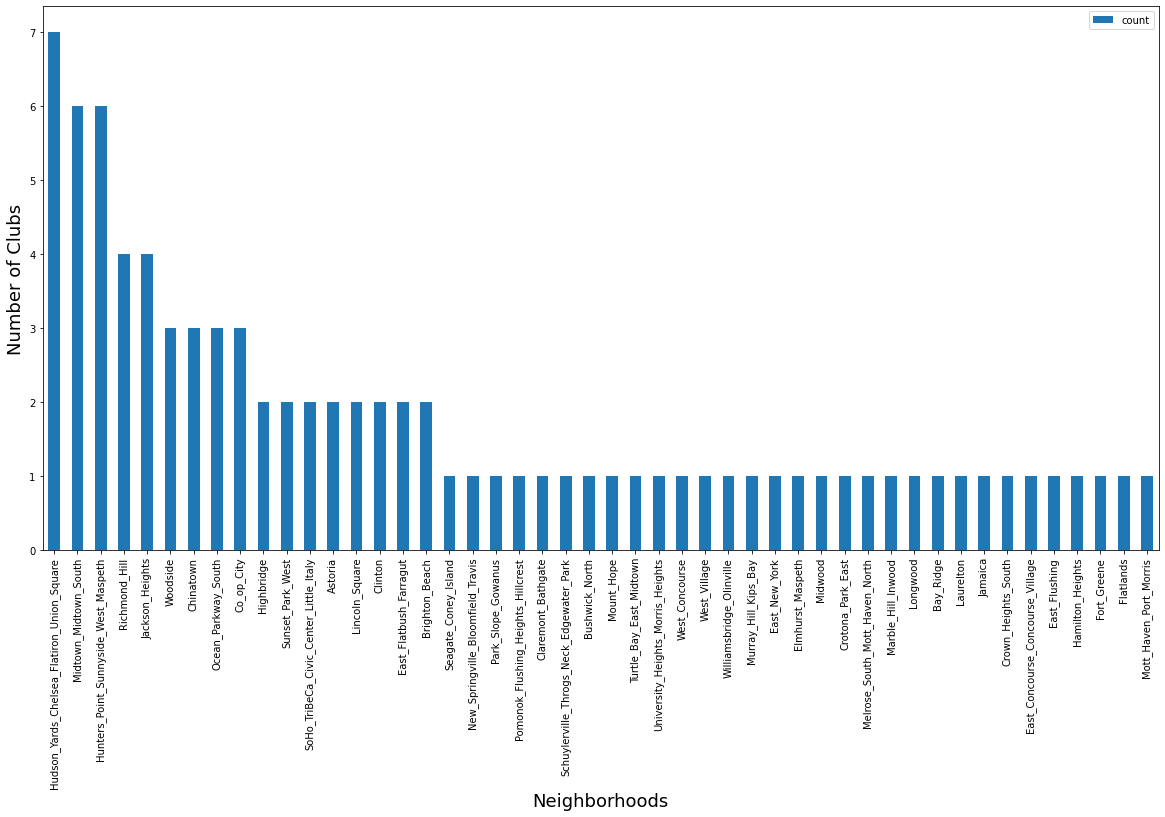

In [41]:
ax = df_venues_grouped.plot.bar(x='map_neighborhood', y='count', rot=90,figsize=(20,10))
ax.set_ylabel('Number of Clubs',fontsize=18)
ax.set_xlabel('Neighborhoods',fontsize=18)

In [42]:
address = 'New York,NY'
geolocator = Nominatim(user_agent="newyork_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of New York re {},{}.'.format(latitude,longitude));

The geographical coordinate of New York re 40.7127281,-74.0060152.


In [43]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=11)

In [44]:
nyc_geo = r'nyc-neighborhoods.geo.json' # geojson file
map_newyork.choropleth(
    geo_data=".\\data\\"+nyc_geo,
    data=df_venues_grouped,
    columns=['map_neighborhood', 'count'],
    key_on='feature.id',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='New York'
)
#feature.properties.name is probably better but just use feature.id for now.
# display map
map_newyork

C:\Users\psharer\AppData\Local\Continuum\anaconda3\envs\capstone\lib\site-packages\folium\folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [50]:
map_newyork_centers_clubs = folium.Map(location=[latitude, longitude], zoom_start=11)

In [51]:
for lat, lon, name in zip(neighborhoods["Latitude"],neighborhoods["Longitude"],neighborhoods["Neighborhood"]):
    folium.CircleMarker(
    [lat,lon],
    radius=5,
    color='red',
    popup=name,
    fill = True,
    fill_color='red',
    fill_opacity=0.6,
    ).add_to(map_newyork_centers_clubs)

In [52]:
for lat, lon, name in zip(df_venues["lat"],df_venues["lng"],df_venues["name"]):
    folium.CircleMarker(
    [lat,lon],
    radius=5,
    color='blue',
    popup=name,
    fill = True,
    fill_color='blue',
    fill_opacity=0.6,
    ).add_to(map_newyork_centers_clubs)

In [53]:
map_newyork_centers_clubs

Choose the top four neighborhoods with clubs

In [54]:
df_venues_grouped

map_neighborhood  proximal_neighborhood  \
20  Hudson_Yards_Chelsea_Flatiron_Union_Square                    0.0   
29                       Midtown_Midtown_South                    0.0   
21        Hunters_Point_Sunnyside_West_Maspeth                    0.0   
38                               Richmond_Hill                    0.0   
22                             Jackson_Heights                    0.0   
48                                    Woodside                    0.0   
5                                    Chinatown                    0.0   
35                         Ocean_Parkway_South                    0.0   
8                                   Co_op_City                    0.0   
19                                  Highbridge                    0.0   
42                            Sunset_Park_West                    0.0   
41      SoHo_TriBeCa_Civic_Center_Little_Italy                    0.0   
1                                      Astoria                    0.0   
25                              Lincoln_Square                    0.0   
7                                      Clinton                    0.0   
12                      East_Flatbush_Farragut                    0.0   
3                               Brighton_Beach                    0.0   
40                        Seagate_Coney_Island                    0.0   
34           New_Springville_Bloomfield_Travis                    0.0   
36                          Park_Slope_Gowanus                    0.0   
37          Pomonok_Flushing_Heights_Hillcrest                    0.0   
6                           Claremont_Bathgate                    0.0   
39    Schuylerville_Throgs_Neck_Edgewater_Park                    0.0   
4                               Bushwick_North                    0.0   
32                                  Mount_Hope                    0.0   
43                     Turtle_Bay_East_Midtown                    0.0   
44           University_Heights_Morris_Heights                    0.0   
45                              West_Concourse                    0.0   
46                                West_Village                    0.0   
47                    Williamsbridge_Olinville                    0.0   
33                        Murray_Hill_Kips_Bay                    0.0   
14                               East_New_York                    0.0   
15                            Elmhurst_Maspeth                    0.0   
30                                     Midwood                    0.0   
9                            Crotona_Park_East                    0.0   
28              Melrose_South_Mott_Haven_North                    0.0   
27                          Marble_Hill_Inwood                    0.0   
26                                    Longwood                    0.0   
2                                    Bay_Ridge                    0.0   
24                                   Laurelton                    0.0   
23                                     Jamaica                    0.0   
10                         Crown_Heights_South                    0.0   
11            East_Concourse_Concourse_Village                    0.0   
13                               East_Flushing                    0.0   
18                            Hamilton_Heights                    0.0   
17                                 Fort_Greene                    0.0   
16                                   Flatlands                    0.0   
31                      Mott_Haven_Port_Morris                    0.0   

    distance  postalCode  count  
20     21478     70069.0      7  
29     17421     50096.0      6  
21     18153     66887.0      6  
38      5818     34256.0      4  
22      5777     34117.0      4  
48      7849     34131.0      3  
5       8381     30006.0      3  
35      8103     33690.0      3  
8       6473     10466.0      3  
19      3793     10452.0      2  
42      3986     22452.0      2  
41      5997     20025.0      2  
1       61

In [55]:
top_four_neighborhoods = df_venues_grouped.iloc[0:4]
top_four_neighborhoods

map_neighborhood  proximal_neighborhood  \
20  Hudson_Yards_Chelsea_Flatiron_Union_Square                    0.0   
29                       Midtown_Midtown_South                    0.0   
21        Hunters_Point_Sunnyside_West_Maspeth                    0.0   
38                               Richmond_Hill                    0.0   

    distance  postalCode  count  
20     21478     70069.0      7  
29     17421     50096.0      6  
21     18153     66887.0      6  
38      5818     34256.0      4

In [56]:
init = [False for i in range(0,len(df_venues))]

In [57]:
idx = init
for neighborhoodName in top_four_neighborhoods["map_neighborhood"]:
    idx = (df_venues["map_neighborhood"]==neighborhoodName) | idx

In [58]:
import numpy as np
np.where(idx)[0]

array([28, 29, 31, 33, 34, 35, 36, 39, 54, 55, 56, 60, 61, 62, 64, 70, 72,
       74, 79, 86, 87, 88, 90], dtype=int64)

In [59]:
df_venues_candidate_neigh = df_venues[idx]

In [60]:
df_venues_candidate_neigh = df_venues_candidate_neigh.sort_values(by="map_neighborhood",ascending=False,axis=0)

In [61]:
df_venues_candidate_neigh

name  proximal_neighborhood  \
4                    Splash Night Club                    NaN   
2                   Mingle's Nightclub                    NaN   
1                       Mazi Nightclub                    NaN   
0              Moka Nightclub & Lounge                    NaN   
3                       Blue Nightclub                    NaN   
4                    Mission Nightclub                    NaN   
5                                 Lavo                    NaN   
2                  The World Nightclub                    NaN   
7              New York Nightclubs VIP                    NaN   
6                     Ammos Night Club                    NaN   
1                   Doha Nightclub NYC                    NaN   
8                    Chango Night Club                    NaN   
6               LIT NYC GENTLEMEN CLUB                    NaN   
10                              Deseos                    NaN   
5                              Purlieu                    NaN   
0           Embassy Nightclub & Lounge                    NaN   
3   Truth Nightclub (Ghost Club Power)                    NaN   
10                        TAO Downtown                    NaN   
12                               1 OAK                    NaN   
11                           Studio 21                    NaN   
10                             Marquee                    NaN   
17                              Avenue                    NaN   
3                    J'adore Nightclub                    NaN   

                              map_neighborhood        lat        lng  \
4                                Richmond_Hill  40.689850 -73.825340   
2                                Richmond_Hill  40.692475 -73.816464   
1                                Richmond_Hill  40.698759 -73.819341   
0                                Richmond_Hill  40.698868 -73.819364   
3                        Midtown_Midtown_South  40.757651 -73.987150   
4                        Midtown_Midtown_South  40.747934 -73.994962   
5                        Midtown_Midtown_South  40.762919 -73.971338   
2                        Midtown_Midtown_South  40.756600 -73.990079   
7                        Midtown_Midtown_South  40.744770 -73.987105   
6                        Midtown_Midtown_South  40.754124 -73.977017   
1         Hunters_Point_Sunnyside_West_Maspeth  40.753056 -73.933011   
8         Hunters_Point_Sunnyside_West_Maspeth  40.752911 -73.932937   
6         Hunters_Point_Sunnyside_West_Maspeth  40.754276 -73.922647   
10        Hunters_Point_Sunnyside_West_Maspeth  40.744479 -73.911792   
5         Hunters_Point_Sunnyside_West_Maspeth  40.755382 -73.927638   
0         Hunters_Point_Sunnyside_West_Maspeth  40.744403 -73.931507   
3   Hudson_Yards_Chelsea_Flatiron_Union_Square  40.742066 -74.006872   
10  Hudson_Yards_Chelsea_Flatiron_Union_Square  40.742539 -74.003812   
12  Hudson_Yards_Chelsea_Flatiron_Union_Square  40.743838 -74.006357   
11  Hudson_Yards_Chelsea_Flatiron_Union_Square  40.741582 -73.993585   
10  Hudson_Yards_Chelsea_Flatiron_Union_Square  40.750097 -74.002814   
17  Hudson_Yards_Chelsea_Flatiron_Union_Square  40.744114 -74.006642   
3   Hudson_Yards_Chelsea_Flatiron_Union_Square  40.738887 -73.994243   

    distance neighborhood        categories               address  \
4       1747    Riverdale         Nightclub      119-12 101st Ave   
2       1808  Eastchester         Nightclub   103-18 101st Avenue   
1       1136   Co-op City         Nightclub       130-35 91st Ave   
0       1127    Wakefield            Lounge        13035 91st Ave   
3       3009    Fieldston         Nightclub         220 W 44th St   
4       2962    Riverdale         Nightclub         229 W 28th St   
5       1684  Kingsbridge         Nightclub          39 E 58th St   
2       3272  Eastchester         Nightclub           669 8th Ave   
7       3211          NaN         Nightclub  244 5th Ave Ste A268   
6       3283          NaN         Nightclub           

In [62]:
ratings =[]
for venue_id in df_venues_candidate_neigh["id"]:
    if not venue_id is np.NaN:
        ratings.append(get_venue_rating_from_id(venue_id))
    else:
        ratings.append(-1)

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'likes', 'dislike', 'ok', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'description', 'storeId', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes'])
dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'likes', 'dislike', 'ok', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes'])
dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'venuePage', 'reasons', 'description', 'page

In [63]:
df_venues_candidate_neigh["ratings"]= ratings

In [64]:
df_venues_candidate_neigh

name  proximal_neighborhood  \
4                    Splash Night Club                    NaN   
2                   Mingle's Nightclub                    NaN   
1                       Mazi Nightclub                    NaN   
0              Moka Nightclub & Lounge                    NaN   
3                       Blue Nightclub                    NaN   
4                    Mission Nightclub                    NaN   
5                                 Lavo                    NaN   
2                  The World Nightclub                    NaN   
7              New York Nightclubs VIP                    NaN   
6                     Ammos Night Club                    NaN   
1                   Doha Nightclub NYC                    NaN   
8                    Chango Night Club                    NaN   
6               LIT NYC GENTLEMEN CLUB                    NaN   
10                              Deseos                    NaN   
5                              Purlieu                    NaN   
0           Embassy Nightclub & Lounge                    NaN   
3   Truth Nightclub (Ghost Club Power)                    NaN   
10                        TAO Downtown                    NaN   
12                               1 OAK                    NaN   
11                           Studio 21                    NaN   
10                             Marquee                    NaN   
17                              Avenue                    NaN   
3                    J'adore Nightclub                    NaN   

                              map_neighborhood        lat        lng  \
4                                Richmond_Hill  40.689850 -73.825340   
2                                Richmond_Hill  40.692475 -73.816464   
1                                Richmond_Hill  40.698759 -73.819341   
0                                Richmond_Hill  40.698868 -73.819364   
3                        Midtown_Midtown_South  40.757651 -73.987150   
4                        Midtown_Midtown_South  40.747934 -73.994962   
5                        Midtown_Midtown_South  40.762919 -73.971338   
2                        Midtown_Midtown_South  40.756600 -73.990079   
7                        Midtown_Midtown_South  40.744770 -73.987105   
6                        Midtown_Midtown_South  40.754124 -73.977017   
1         Hunters_Point_Sunnyside_West_Maspeth  40.753056 -73.933011   
8         Hunters_Point_Sunnyside_West_Maspeth  40.752911 -73.932937   
6         Hunters_Point_Sunnyside_West_Maspeth  40.754276 -73.922647   
10        Hunters_Point_Sunnyside_West_Maspeth  40.744479 -73.911792   
5         Hunters_Point_Sunnyside_West_Maspeth  40.755382 -73.927638   
0         Hunters_Point_Sunnyside_West_Maspeth  40.744403 -73.931507   
3   Hudson_Yards_Chelsea_Flatiron_Union_Square  40.742066 -74.006872   
10  Hudson_Yards_Chelsea_Flatiron_Union_Square  40.742539 -74.003812   
12  Hudson_Yards_Chelsea_Flatiron_Union_Square  40.743838 -74.006357   
11  Hudson_Yards_Chelsea_Flatiron_Union_Square  40.741582 -73.993585   
10  Hudson_Yards_Chelsea_Flatiron_Union_Square  40.750097 -74.002814   
17  Hudson_Yards_Chelsea_Flatiron_Union_Square  40.744114 -74.006642   
3   Hudson_Yards_Chelsea_Flatiron_Union_Square  40.738887 -73.994243   

    distance neighborhood        categories               address  \
4       1747    Riverdale         Nightclub      119-12 101st Ave   
2       1808  Eastchester         Nightclub   103-18 101st Avenue   
1       1136   Co-op City         Nightclub       130-35 91st Ave   
0       1127    Wakefield            Lounge        13035 91st Ave   
3       3009    Fieldston         Nightclub         220 W 44th St   
4       2962    Riverdale         Nightclub         229 W 28th St   
5       1684  Kingsbridge         Nightclub          39 E 58th St   
2       3272  Eastchester         Nightclub           669 8th Ave   
7       3211          NaN         Nightclub  244 5th Ave Ste A268   
6       3283          NaN         Nightclub           

In [69]:
df_venues_neigh_for_clustering = df_venues_candidate_neigh.drop('address', axis=1)

In [70]:
X = df_venues_neigh_for_clustering[["lat","lng","ratings"]]

In [71]:
X

lat        lng  ratings
4   40.689850 -73.825340     -1.0
2   40.692475 -73.816464     -1.0
1   40.698759 -73.819341     -1.0
0   40.698868 -73.819364     -1.0
3   40.757651 -73.987150     -1.0
4   40.747934 -73.994962     -1.0
5   40.762919 -73.971338     -1.0
2   40.756600 -73.990079     -1.0
7   40.744770 -73.987105     -1.0
6   40.754124 -73.977017     -1.0
1   40.753056 -73.933011      7.2
8   40.752911 -73.932937     -1.0
6   40.754276 -73.922647      6.7
10  40.744479 -73.911792      7.0
5   40.755382 -73.927638      6.1
0   40.744403 -73.931507     -1.0
3   40.742066 -74.006872     -1.0
10  40.742539 -74.003812     -1.0
12  40.743838 -74.006357     -1.0
11  40.741582 -73.993585      6.6
10  40.750097 -74.002814     -1.0
17  40.744114 -74.006642      7.6
3   40.738887 -73.994243     -1.0

In [72]:
from sklearn.cluster import KMeans 

In [73]:
from sklearn.preprocessing import StandardScaler
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[-2.32715332,  1.85556716, -0.59262914],
       [-2.20443821,  1.99187788, -0.59262914],
       [-1.91067249,  1.94769507, -0.59262914],
       [-1.90560172,  1.94733898, -0.59262914],
       [ 0.84220846, -0.62923116, -0.59262914],
       [ 0.3879995 , -0.74919002, -0.59262914],
       [ 1.08846876, -0.38641391, -0.59262914],
       [ 0.79308986, -0.67420688, -0.59262914],
       [ 0.24007308, -0.62853848, -0.59262914],
       [ 0.67733899, -0.4736258 , -0.59262914],
       [ 0.62741537,  0.20214342,  1.77537629],
       [ 0.6206592 ,  0.20328391, -0.59262914],
       [ 0.68445197,  0.36130343,  1.63098571],
       [ 0.22647248,  0.52798915,  1.71762006],
       [ 0.73612391,  0.28465199,  1.45771702],
       [ 0.22293125,  0.22523929, -0.59262914],
       [ 0.11368828, -0.93208806, -0.59262914],
       [ 0.13578965, -0.88509912, -0.59262914],
       [ 0.19650109, -0.924173  , -0.59262914],
       [ 0.09104353, -0.72804782,  1.6021076 ],
       [ 0.48911973, -0.86977601, -0.592

In [74]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[1 1 1 1 0 0 0 0 0 0 2 0 2 2 2 0 0 0 0 2 0 2 0]


In [75]:
df_venues_neigh_for_clustering["Labels"] = labels

In [76]:
df_venues_neigh_for_clustering

name  proximal_neighborhood  \
4                    Splash Night Club                    NaN   
2                   Mingle's Nightclub                    NaN   
1                       Mazi Nightclub                    NaN   
0              Moka Nightclub & Lounge                    NaN   
3                       Blue Nightclub                    NaN   
4                    Mission Nightclub                    NaN   
5                                 Lavo                    NaN   
2                  The World Nightclub                    NaN   
7              New York Nightclubs VIP                    NaN   
6                     Ammos Night Club                    NaN   
1                   Doha Nightclub NYC                    NaN   
8                    Chango Night Club                    NaN   
6               LIT NYC GENTLEMEN CLUB                    NaN   
10                              Deseos                    NaN   
5                              Purlieu                    NaN   
0           Embassy Nightclub & Lounge                    NaN   
3   Truth Nightclub (Ghost Club Power)                    NaN   
10                        TAO Downtown                    NaN   
12                               1 OAK                    NaN   
11                           Studio 21                    NaN   
10                             Marquee                    NaN   
17                              Avenue                    NaN   
3                    J'adore Nightclub                    NaN   

                              map_neighborhood        lat        lng  \
4                                Richmond_Hill  40.689850 -73.825340   
2                                Richmond_Hill  40.692475 -73.816464   
1                                Richmond_Hill  40.698759 -73.819341   
0                                Richmond_Hill  40.698868 -73.819364   
3                        Midtown_Midtown_South  40.757651 -73.987150   
4                        Midtown_Midtown_South  40.747934 -73.994962   
5                        Midtown_Midtown_South  40.762919 -73.971338   
2                        Midtown_Midtown_South  40.756600 -73.990079   
7                        Midtown_Midtown_South  40.744770 -73.987105   
6                        Midtown_Midtown_South  40.754124 -73.977017   
1         Hunters_Point_Sunnyside_West_Maspeth  40.753056 -73.933011   
8         Hunters_Point_Sunnyside_West_Maspeth  40.752911 -73.932937   
6         Hunters_Point_Sunnyside_West_Maspeth  40.754276 -73.922647   
10        Hunters_Point_Sunnyside_West_Maspeth  40.744479 -73.911792   
5         Hunters_Point_Sunnyside_West_Maspeth  40.755382 -73.927638   
0         Hunters_Point_Sunnyside_West_Maspeth  40.744403 -73.931507   
3   Hudson_Yards_Chelsea_Flatiron_Union_Square  40.742066 -74.006872   
10  Hudson_Yards_Chelsea_Flatiron_Union_Square  40.742539 -74.003812   
12  Hudson_Yards_Chelsea_Flatiron_Union_Square  40.743838 -74.006357   
11  Hudson_Yards_Chelsea_Flatiron_Union_Square  40.741582 -73.993585   
10  Hudson_Yards_Chelsea_Flatiron_Union_Square  40.750097 -74.002814   
17  Hudson_Yards_Chelsea_Flatiron_Union_Square  40.744114 -74.006642   
3   Hudson_Yards_Chelsea_Flatiron_Union_Square  40.738887 -73.994243   

    distance neighborhood        categories  \
4       1747    Riverdale         Nightclub   
2       1808  Eastchester         Nightclub   
1       1136   Co-op City         Nightclub   
0       1127    Wakefield            Lounge   
3       3009    Fieldston         Nightclub   
4       2962    Riverdale         Nightclub   
5       1684  Kingsbridge         Nightclub   
2       3272  Eastchester         Nightclub   
7       3211          NaN         Nightclub   
6       3283          NaN         Nightclub   
1       3111          NaN         Nightclub   
8       3101          NaN         Nightclub   
6       3172          NaN         Nightclub   
10      2694   Baychester         Nightclub   
5       3590          NaN            Lo

In [92]:
df_venues_neigh_for_clustering[["name","ratings"]].sort_values(by="ratings",ascending=False)

name  ratings
17                              Avenue      7.6
1                   Doha Nightclub NYC      7.2
10                              Deseos      7.0
6               LIT NYC GENTLEMEN CLUB      6.7
11                           Studio 21      6.6
5                              Purlieu      6.1
4                    Splash Night Club     -1.0
10                             Marquee     -1.0
12                               1 OAK     -1.0
10                        TAO Downtown     -1.0
3   Truth Nightclub (Ghost Club Power)     -1.0
0           Embassy Nightclub & Lounge     -1.0
8                    Chango Night Club     -1.0
2                   Mingle's Nightclub     -1.0
6                     Ammos Night Club     -1.0
7              New York Nightclubs VIP     -1.0
2                  The World Nightclub     -1.0
5                                 Lavo     -1.0
4                    Mission Nightclub     -1.0
3                       Blue Nightclub     -1.0
0              Moka Nightclub & Lounge     -1.0
1                       Mazi Nightclub     -1.0
3                    J'adore Nightclub     -1.0

In [77]:
df_venues_centroids = df_venues_neigh_for_clustering.groupby('Labels').mean()

In [78]:
df_venues_centroids["type"] = [ "bad" if i<0 else "good" for i in df_venues_centroids["ratings"]]

In [79]:
df_venues_centroids

proximal_neighborhood        lat        lng     distance  \
Labels                                                             
0                         NaN  40.749134 -73.983553  3003.384615   
1                         NaN  40.694988 -73.820127  1454.500000   
2                         NaN  40.748815 -73.949219  3001.333333   

          postalCode  count   ratings  type  
Labels                                       
0       10195.500000    1.0 -1.000000   bad  
1       11418.666667    1.0 -1.000000   bad  
2       10784.333333    1.0  6.866667  good

In [80]:
map_newyork_with_centroids = folium.Map(location=[latitude, longitude], zoom_start=11)

In [81]:
for lat, lon, rating, name in zip(df_venues_neigh_for_clustering["lat"],df_venues_neigh_for_clustering["lng"],df_venues_neigh_for_clustering["ratings"],df_venues_neigh_for_clustering["name"]):
    folium.CircleMarker(
    [lat,lon],
    radius=5,
    color='blue',
    popup=name+"("+str(rating)+")",
    fill = True,
    fill_color='blue',
    fill_opacity=0.6,
    ).add_to(map_newyork_with_centroids)

In [82]:
for lat, lon, rating in zip(df_venues_centroids["lat"],df_venues_centroids["lng"],df_venues_centroids["ratings"]):
    folium.CircleMarker(
    [lat,lon],
    radius=5,
    color='green' if rating > 0 else "black",
    popup=str(rating),
    fill = True,
    fill_color='green' if rating > 0 else "black",
    fill_opacity=0.6,
    ).add_to(map_newyork_with_centroids)

In [83]:
map_newyork_with_centroids

In [95]:
df_venues_with_id = df_venues_candidate_neigh["id"].sort_values()

In [97]:
tip  = get_venue_tips_from_id(df_venues_with_id.iloc[0])

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'price', 'hasMenu', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'venuePage', 'reasons', 'description', 'storeId', 'page', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


In [113]:
tip['groups'][0]['items'][0]['text']

"Want chicken with your Gaga? This megaclub serves a full international-themed menu, so you can't blame an empty stomach for feeling a few butterflies when you spot stars like Chace Crawford."

In [114]:
tip

{'count': 67,
 'groups': [{'type': 'others',
   'name': 'All tips',
   'count': 67,
   'items': [{'id': '4c7305f5f3279c74177cb02d',
     'createdAt': 1282606581,
     'text': "Want chicken with your Gaga? This megaclub serves a full international-themed menu, so you can't blame an empty stomach for feeling a few butterflies when you spot stars like Chace Crawford.",
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/4c7305f5f3279c74177cb02d',
     'lang': 'en',
     'likes': {'count': 14,
      'groups': [{'type': 'others', 'count': 14, 'items': []}],
      'summary': '14 likes'},
     'logView': True,
     'agreeCount': 14,
     'disagreeCount': 0,
     'todo': {'count': 218},
     'user': {'firstName': 'People', 'countryCode': 'US', 'type': 'page'}}]}]}